**DIPLOMADO EN DATA SCIENCE**

***PREDECIR EL COMPORTAMIENTO DE LOS CASOS DIARIO TOTALES DE COVID-19 EN CHILE***

DANGGELLO CARRERA BELLO

### Librerías

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px

### Adquisición datos iniciales

In [ ]:
# Copiar Datos desde Github

! git clone https://github.com/MinCiencia/Datos-COVID19.git

fatal: destination path 'Datos-COVID19' already exists and is not an empty directory.


### Descripción y Exploración de los datos

#### Casos diarios nacionales

In [ ]:
RutaCT = '/content/Datos-COVID19/output/producto5/TotalesNacionales_T.csv'
CasosTotales = pd.read_csv(RutaCT)
CasosTotales

,Fecha,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
0,2020-03-02,1.0,1.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,2.0,3.0,0.0,0.0,3.0,NaN,2.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,1.0,4.0,0.0,0.0,4.0,NaN,1.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,1.0,5.0,0.0,0.0,5.0,NaN,1.0,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2022-02-28,10261.0,3061019.0,NaN,42353.0,112966.0,1898.0,18148.0,408306.0,112966.0,2905700.0,2610360.0,2898013.0,112966.0,354096.0,30.0,5989.0,423762.0,14301.0,4979.0
729,2022-03-01,9239.0,3076291.0,NaN,42381.0,98421.0,1172.0,13928.0,398599.0,98421.0,2935489.0,2635311.0,2927793.0,98421.0,354106.0,30.0,3517.0,428341.0,14307.0,4583.0
730,2022-03-02,13074.0,3098110.0,NaN,42411.0,91717.0,2418.0,20400.0,388256.0,91717.0,2963982.0,2667443.0,2956270.0,91717.0,354110.0,33.0,4908.0,437844.0,14793.0,9508.0
731,2022-03-03,13531.0,3122802.0,NaN,42683.0,91035.0,3606.0,23395.0,375250.0,91035.0,2989084.0,2704869.0,2981315.0,91035.0,354105.0,27.0,6258.0,445594.0,15008.0,7754.0


In [ ]:
CasosTotales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Fecha                                  733 non-null    object 
 1   Casos nuevos con sintomas              733 non-null    float64
 2   Casos totales                          733 non-null    float64
 3   Casos recuperados                      92 non-null     float64
 4   Fallecidos                             733 non-null    float64
 5   Casos activos                          714 non-null    float64
 6   Casos nuevos sin sintomas              675 non-null    float64
 7   Casos nuevos totales                   733 non-null    float64
 8   Casos activos por FD                   733 non-null    float64
 9   Casos activos por FIS                  622 non-null    float64
 10  Casos recuperados por FIS              622 non-null    float64
 11  Casos 

In [ ]:
CasosTotales.isnull().sum()*100/len(CasosTotales)


Fecha                                     0.000000
Casos nuevos con sintomas                 0.000000
Casos totales                             0.000000
Casos recuperados                        87.448840
Fallecidos                                0.000000
Casos activos                             2.592087
Casos nuevos sin sintomas                 7.912688
Casos nuevos totales                      0.000000
Casos activos por FD                      0.000000
Casos activos por FIS                    15.143247
Casos recuperados por FIS                15.143247
Casos recuperados por FD                  0.000000
Casos confirmados recuperados            15.143247
Casos activos confirmados                15.143247
Casos probables acumulados               15.143247
Casos activos probables                  15.143247
Casos nuevos sin notificar               18.826739
Casos confirmados por antigeno           49.113233
Casos con sospecha de reinfeccion        49.113233
Casos nuevos confirmados por an

In [ ]:
CasosTotales.describe()

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos confirmados por antigeno,Casos con sospecha de reinfeccion,Casos nuevos confirmados por antigeno
count,733.000000,7.330000e+02,92.000000,733.000000,714.000000,675.000000,733.000000,733.000000,622.000000,6.220000e+02,7.330000e+02,6.220000e+02,622.000000,622.000000,622.000000,595.000000,373.000000,373.000000,373.000000
mean,2707.375171,1.001431e+06,8647.413043,21900.527967,23869.260504,846.426667,4141.836289,57071.136426,25684.553055,1.120770e+06,9.224596e+05,1.118951e+06,25684.553055,205887.877814,4278.728296,790.117647,79844.946381,2474.782842,1207.482574
std,3652.837280,7.256350e+05,11519.219916,13812.303126,25959.570593,861.847592,6279.124429,87477.416743,26709.554018,6.306871e+05,6.694336e+05,6.287410e+05,26709.554018,126295.624096,4082.619223,2123.530410,85424.714662,2948.601050,2549.225442
min,0.000000,1.000000e+00,0.000000,0.000000,1.000000,56.000000,0.000000,1.000000,2910.000000,2.005690e+05,0.000000e+00,2.005690e+05,2910.000000,21897.000000,22.000000,4.000000,61.000000,316.000000,0.000000
25%,848.000000,4.131450e+05,20.750000,11321.000000,8874.000000,345.500000,1247.000000,19201.000000,9646.250000,5.181575e+05,3.775340e+05,5.178515e+05,9646.250000,73878.000000,1531.000000,55.000000,33961.000000,1102.000000,138.000000
50%,1426.000000,8.355520e+05,3460.000000,20704.000000,15161.500000,517.000000,2064.000000,28186.000000,16340.000000,1.117376e+06,7.636100e+05,1.116802e+06,16340.000000,214993.000000,2894.500000,137.000000,65274.000000,1785.000000,288.000000
75%,3325.000000,1.639698e+06,12778.250000,36995.000000,30819.000000,1104.000000,4416.000000,62352.000000,33356.750000,1.612358e+06,1.594694e+06,1.609386e+06,33356.750000,334866.750000,5954.500000,324.000000,89000.000000,2087.000000,615.000000
max,21103.000000,3.147434e+06,44946.000000,42809.000000,147753.000000,5180.000000,38446.000000,489547.000000,147753.000000,3.014146e+06,2.740649e+06,3.006337e+06,147753.000000,355704.000000,14568.000000,12330.000000,453136.000000,15231.000000,11176.000000


In [ ]:
CasosNuevos = pd.DataFrame(CasosTotales[['Fecha', 'Casos totales','Casos nuevos totales', 'Casos activos por FD','Casos recuperados por FD']])

In [ ]:
CasosNuevos['Fecha'] = pd.to_datetime(CasosNuevos.Fecha, format='%Y/%m/%d')

In [ ]:
CasosNuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     733 non-null    datetime64[ns]
 1   Casos totales             733 non-null    float64       
 2   Casos nuevos totales      733 non-null    float64       
 3   Casos activos por FD      733 non-null    float64       
 4   Casos recuperados por FD  733 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 28.8 KB


#### Casos diarios UCI por region

In [ ]:
RutaCasosUCI= '/content/Datos-COVID19/output/producto8/UCI_std.csv'
CasosUCI_Covid = pd.read_csv(RutaCasosUCI)
CasosUCI_Covid

,Region,Codigo region,Poblacion,fecha,numero
0,Arica y Parinacota,15,252110,2020-04-01,0
1,Tarapacá,1,382773,2020-04-01,1
2,Antofagasta,2,691854,2020-04-01,3
3,Atacama,3,314709,2020-04-01,0
4,Coquimbo,4,836096,2020-04-01,1
...,...,...,...,...,...
11243,Araucanía,9,1014343,2022-03-04,52
11244,Los Ríos,14,405835,2022-03-04,15
11245,Los Lagos,10,891440,2022-03-04,65
11246,Aysén,11,107297,2022-03-04,3


In [ ]:
CasosUCI_Covid.describe()

,Codigo region,Poblacion,numero
count,11248.000000,1.124800e+04,11248.000000
mean,8.500000,1.216144e+06,80.980530
std,4.609977,1.854240e+06,225.269104
min,1.000000,1.072970e+05,0.000000
25%,4.750000,3.657570e+05,9.000000
50%,8.500000,7.639750e+05,22.000000
75%,12.250000,1.043742e+06,61.000000
max,16.000000,8.125072e+06,2015.000000


In [ ]:
CasosUCI_Covid.rename({'numero':'Casos UCI'}, axis=1, inplace=True)
CasosUCI_Covid.columns

Index(['Region', 'Codigo region', 'Poblacion', 'fecha', 'Casos UCI'], dtype='object')

In [ ]:
missing3 = CasosUCI_Covid.isnull().sum()*100/len(CasosUCI_Covid)
missing3

Region           0.0
Codigo region    0.0
Poblacion        0.0
fecha            0.0
Casos UCI        0.0
dtype: float64

In [ ]:
CasosUCI_Covid.rename({'Codigo region':'Region ID'}, axis=1, inplace=True)
CasosUCI_Covid.rename({'fecha':'Fecha'}, axis=1, inplace=True)
CasosUCI_Covid['Fecha'] = pd.to_datetime(CasosUCI_Covid.Fecha, format='%Y/%m/%d')

In [ ]:
CasosUCI_Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Region     11248 non-null  object        
 1   Region ID  11248 non-null  int64         
 2   Poblacion  11248 non-null  int64         
 3   Fecha      11248 non-null  datetime64[ns]
 4   Casos UCI  11248 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 439.5+ KB


In [ ]:
CasosUCI_Covid['Fecha'].dt.date.min()

datetime.date(2020, 4, 1)

In [ ]:
fig = px.line(CasosUCI_Covid, x="Fecha", y="Casos UCI", color='Region')

fig.update_layout(
    title={
        'text': "Cantidad de Casos UCI",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Casos nuevos sin sintomas diarios por region

In [ ]:
RutaCasosNuevosSS= '/content/Datos-COVID19/output/producto27/CasosNuevosSinSintomas_std.csv'
CasosNuevosSS_Covid = pd.read_csv(RutaCasosNuevosSS)
CasosNuevosSS_Covid

,Region,Fecha,Casos confirmados
0,Arica y Parinacota,2020-04-29,0.0
1,Tarapacá,2020-04-29,0.0
2,Antofagasta,2020-04-29,0.0
3,Atacama,2020-04-29,0.0
4,Coquimbo,2020-04-29,0.0
...,...,...,...
11470,Los Ríos,2022-03-04,58.0
11471,Los Lagos,2022-03-04,349.0
11472,Aysén,2022-03-04,80.0
11473,Magallanes,2022-03-04,17.0


In [ ]:
CasosNuevosSS_Covid.describe()

,Casos confirmados
count,11475.000000
mean,99.579608
std,295.519045
min,0.000000
25%,8.000000
50%,24.000000
75%,71.000000
max,5180.000000


In [ ]:
missing5 = CasosNuevosSS_Covid.isnull().sum()*100/len(CasosNuevosSS_Covid)
missing5

Region               0.0
Fecha                0.0
Casos confirmados    0.0
dtype: float64

In [ ]:
CasosNuevosSS_Covid['Fecha'] = pd.to_datetime(CasosNuevosSS_Covid.Fecha, format='%Y/%m/%d')

In [ ]:
CasosNuevosSS_Covid.rename({'Casos confirmados':'Casos Sin Sintomas'}, axis=1, inplace=True)

In [ ]:
CasosNuevosSS_Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11475 entries, 0 to 11474
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Region              11475 non-null  object        
 1   Fecha               11475 non-null  datetime64[ns]
 2   Casos Sin Sintomas  11475 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 269.1+ KB


#### Casos nuevos con sintomas diarios por region

In [ ]:
RutaCasosNuevosCS= '/content/Datos-COVID19/output/producto26/CasosNuevosConSintomas_std.csv'
CasosNuevosCS_Covid = pd.read_csv(RutaCasosNuevosCS)
CasosNuevosCS_Covid

,Region,Fecha,Casos confirmados
0,Arica y Parinacota,2020-03-03,0.0
1,Tarapacá,2020-03-03,0.0
2,Antofagasta,2020-03-03,0.0
3,Atacama,2020-03-03,0.0
4,Coquimbo,2020-03-03,0.0
...,...,...,...
12439,Los Ríos,2022-03-04,506.0
12440,Los Lagos,2022-03-04,716.0
12441,Aysén,2022-03-04,82.0
12442,Magallanes,2022-03-04,108.0


In [ ]:
CasosNuevosCS_Covid.describe()

,Casos confirmados
count,12444.000000
mean,318.949695
std,1162.238158
min,0.000000
25%,17.000000
50%,55.000000
75%,170.250000
max,21103.000000


In [ ]:
CasosNuevosCS_Covid['Fecha'] = pd.to_datetime(CasosNuevosCS_Covid.Fecha, format='%Y/%m/%d')

In [ ]:
CasosNuevosCS_Covid.rename({'Casos confirmados':'Casos Con Sintomas'}, axis=1, inplace=True)

In [ ]:
CasosNuevosCS_Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12444 entries, 0 to 12443
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Region              12444 non-null  object        
 1   Fecha               12444 non-null  datetime64[ns]
 2   Casos Con Sintomas  12444 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 291.8+ KB


#### Positividad diaria media por region

In [ ]:
RutaPositividad= '/content/Datos-COVID19/input/UC/Positividad por region.csv'
Positividad_Covid = pd.read_csv(RutaPositividad)
Positividad_Covid

,codigo_region,region_residencia,fecha,positividad
0,2,Región de Antofagasta,2020-03-15,NaN
1,2,Región de Antofagasta,2020-03-16,NaN
2,2,Región de Antofagasta,2020-03-17,NaN
3,2,Región de Antofagasta,2020-03-18,NaN
4,2,Región de Antofagasta,2020-03-19,NaN
...,...,...,...,...
11277,13,Región Metropolitana de Santiago,2022-02-14,0.322315
11278,13,Región Metropolitana de Santiago,2022-02-15,0.318762
11279,13,Región Metropolitana de Santiago,2022-02-16,0.313768
11280,13,Región Metropolitana de Santiago,2022-02-17,0.310455


In [ ]:
Positividad_Covid.describe()

,codigo_region,positividad
count,11282.000000,11172.000000
mean,8.501861,0.088876
std,4.608534,0.080171
min,1.000000,0.000000
25%,5.000000,0.033685
50%,8.500000,0.067313
75%,12.750000,0.115356
max,16.000000,0.514625


In [ ]:
Positividad_Covid.rename({'codigo_region':'Region ID'}, axis=1, inplace=True)
Positividad_Covid.rename({'fecha':'Fecha'}, axis=1, inplace=True)
Positividad_Covid.rename({'positividad':'Tasa de Positividad'}, axis=1, inplace=True)
Positividad_Covid['Fecha'] = pd.to_datetime(Positividad_Covid.Fecha, format='%Y/%m/%d')

In [ ]:
Positividad= Positividad_Covid[['Region ID','Fecha','Tasa de Positividad']]

In [ ]:
Positividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11282 entries, 0 to 11281
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Region ID            11282 non-null  int64         
 1   Fecha                11282 non-null  datetime64[ns]
 2   Tasa de Positividad  11172 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 264.5 KB


#### Camas disponibles UCI diarias por region

In [ ]:
RutaDispCamasUCI= '/content/Datos-COVID19/output/producto58/Camas_UCI_diarias_std.csv'
DispCamasUCI_Covid = pd.read_csv(RutaDispCamasUCI)
DispCamasUCI_Covid

,Region,Serie,Fecha,Casos
0,Arica y Parinacota,Camas UCI habilitadas,2020-04-14,9.0
1,Tarapacá,Camas UCI habilitadas,2020-04-14,13.0
2,Antofagasta,Camas UCI habilitadas,2020-04-14,54.0
3,Atacama,Camas UCI habilitadas,2020-04-14,11.0
4,Coquimbo,Camas UCI habilitadas,2020-04-14,46.0
...,...,...,...,...
46711,Los Ríos,Camas base (2019),2022-03-01,13.0
46712,Los Lagos,Camas base (2019),2022-03-01,49.0
46713,Aysén,Camas base (2019),2022-03-01,8.0
46714,Magallanes,Camas base (2019),2022-03-01,14.0


In [ ]:
DispCamasUCI_Covid.describe()

,Casos
count,46716.000000
mean,194.004495
std,492.593232
min,0.000000
25%,14.000000
50%,40.000000
75%,97.000000
max,4544.000000


In [ ]:
DispCamasUCI_Covid['Fecha'] = pd.to_datetime(DispCamasUCI_Covid.Fecha, format='%Y/%m/%d')

In [ ]:
DispCamasUCI_Covid.rename({'Casos':'Camas UCI Disponibles'}, axis=1, inplace=True)
DispCamasUCI_Covid.columns

Index(['Region', 'Serie', 'Fecha', 'Camas UCI Disponibles'], dtype='object')

In [ ]:
CamasUCI = DispCamasUCI_Covid[['Region', 'Fecha','Camas UCI Disponibles']]

In [ ]:
CamasUCIST = CamasUCI[CamasUCI['Region']!='Total']
CamasUCIST

,Region,Fecha,Camas UCI Disponibles
0,Arica y Parinacota,2020-04-14,9.0
1,Tarapacá,2020-04-14,13.0
2,Antofagasta,2020-04-14,54.0
3,Atacama,2020-04-14,11.0
4,Coquimbo,2020-04-14,46.0
...,...,...,...
46710,Araucanía,2022-03-01,49.0
46711,Los Ríos,2022-03-01,13.0
46712,Los Lagos,2022-03-01,49.0
46713,Aysén,2022-03-01,8.0


In [ ]:
fig = px.line(CamasUCIST, x="Fecha", y="Camas UCI Disponibles", color='Region')

fig.update_layout(
    title={
        'text': "Disponibilidad de Camas UCI",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Contaminacion Atmosferica

##### Nivel de CO diario

In [ ]:
RutaCO= '/content/Datos-COVID19/output/producto43/CO-2021_std.csv'
CO = pd.read_csv(RutaCO)
CO

,Nombre de estacion,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Rancagua_I,Talca_La_Florida,Las_Encinas,Padre_las_Casas,Valdivia,Coyhaique_II,Talagante
0,2021-01-01 00:00:00,0.710000,2.51167,NaN,0.66000,1.349500,0.925928,1.326670,1.893330,0.585909,0.260417,0.739242,0.105780,NaN,0.321068,NaN
1,2021-01-01 01:00:00,1.100000,1.96000,NaN,NaN,1.052000,0.403710,1.620000,0.820000,0.523573,0.229583,0.751555,0.108904,NaN,0.160612,NaN
2,2021-01-01 02:00:00,0.926667,1.87833,NaN,1.25167,0.661000,0.536337,0.726667,0.635000,0.456436,0.157417,0.720688,0.102079,NaN,0.109323,NaN
3,2021-01-01 03:00:00,0.965556,1.70889,NaN,1.30444,0.542001,0.760144,0.621111,0.643333,0.365705,0.163583,0.634160,0.100000,NaN,0.100938,NaN
4,2021-01-01 04:00:00,0.943333,1.50889,NaN,1.02667,0.462667,0.801590,0.387778,0.343333,0.308253,0.159167,0.612944,0.100000,NaN,0.100380,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,2021-12-25 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.187520,NaN,0.100000,0.149074,0.206417,0.100000,NaN
8607,2021-12-25 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739078,NaN,0.100000,0.150492,0.216493,0.100000,NaN
8608,2021-12-25 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487251,NaN,0.100000,0.160917,0.220261,0.100000,NaN
8609,2021-12-25 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.315803,NaN,0.100000,0.197446,0.231238,0.100000,NaN


In [ ]:
CO['Fecha'] = pd.to_datetime(CO['Nombre de estacion'], format='%Y/%m/%d')
CO['Fecha']= CO['Fecha'].dt.date

In [ ]:
CO.head()

,Nombre de estacion,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Rancagua_I,Talca_La_Florida,Las_Encinas,Padre_las_Casas,Valdivia,Coyhaique_II,Talagante,Fecha
0,2021-01-01 00:00:00,0.710000,2.51167,NaN,0.66000,1.349500,0.925928,1.326670,1.893330,0.585909,0.260417,0.739242,0.105780,NaN,0.321068,NaN,2021-01-01
1,2021-01-01 01:00:00,1.100000,1.96000,NaN,NaN,1.052000,0.403710,1.620000,0.820000,0.523573,0.229583,0.751555,0.108904,NaN,0.160612,NaN,2021-01-01
2,2021-01-01 02:00:00,0.926667,1.87833,NaN,1.25167,0.661000,0.536337,0.726667,0.635000,0.456436,0.157417,0.720688,0.102079,NaN,0.109323,NaN,2021-01-01
3,2021-01-01 03:00:00,0.965556,1.70889,NaN,1.30444,0.542001,0.760144,0.621111,0.643333,0.365705,0.163583,0.634160,0.100000,NaN,0.100938,NaN,2021-01-01
4,2021-01-01 04:00:00,0.943333,1.50889,NaN,1.02667,0.462667,0.801590,0.387778,0.343333,0.308253,0.159167,0.612944,0.100000,NaN,0.100380,NaN,2021-01-01


In [ ]:
RutaCO20 = '/content/Datos-COVID19/output/producto43/CO-2020_std.csv'
CO20 = pd.read_csv(RutaCO20)
CO20

,Nombre de estacion,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad
0,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Atacama,Coquimbo,Coquimbo,Valparaíso,Valparaíso,...,Los Ríos,Los Ríos,Los Lagos,Los Lagos,Los Lagos,Aysén,Aysén,Magallanes,Los Ríos,Aysén
1,Codigo region,15,1,2,3,3,4,4,5,5,...,14,14,10,10,10,11,11,12,14,11
2,Comuna,Arica,Alto Hospicio,Antofagasta,Copiapo,Huasco,Coquimbo,Coquimbo,Concon,Valparaiso,...,Valdivia,Valdivia,Osorno,Puerto Montt,Puerto Montt,Coyhaique,Coyhaique,Punta Arenas,La Union,Aysen
3,Codigo comuna,15101,1107,2101,3101,3304,4102,4102,5103,5101,...,14101,14101,10301,10101,10101,11101,11101,12101,14201,11201
4,UTM_Este,363747,385118,358874,369133,282682,274609,282211,264737,255891,...,651593,649060,659217,669585,675585,729281,730152,371526,663446,680977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,2020-02-20 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.694192,NaN,NaN,NaN
5383,2020-02-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.597311,NaN,NaN,NaN
5384,2020-02-20 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.536123,NaN,NaN,NaN
5385,2020-02-20 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5353,NaN,NaN,NaN


In [ ]:
CO20.drop(CO20.index[:6], inplace=True)

In [ ]:
CO20['Fecha'] = pd.to_datetime(CO20['Nombre de estacion'], format='%Y/%m/%d')
CO20['Fecha']= CO20['Fecha'].dt.date

In [ ]:
CO20

,Nombre de estacion,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Fecha
6,2020-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.488012,NaN,NaN,NaN,2020-01-01
7,2020-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.545745,NaN,NaN,NaN,2020-01-01
8,2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.547884,NaN,NaN,NaN,2020-01-01
9,2020-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.596324,NaN,NaN,NaN,2020-01-01
10,2020-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.511368,NaN,NaN,NaN,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,2020-02-20 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.694192,NaN,NaN,NaN,2020-02-20
5383,2020-02-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.597311,NaN,NaN,NaN,2020-02-20
5384,2020-02-20 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.536123,NaN,NaN,NaN,2020-02-20
5385,2020-02-20 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.5353,NaN,NaN,NaN,2020-02-20


In [ ]:
CO20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 6 to 5386
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre de estacion  5381 non-null   object
 1   Arica               0 non-null      object
 2   Alto_Hospicio       0 non-null      object
 3   Antofagasta         0 non-null      object
 4   Copiapó             0 non-null      object
 5   Huasco              0 non-null      object
 6   Coquimbo            0 non-null      object
 7   La_Serena           0 non-null      object
 8   Concón              0 non-null      object
 9   Valparaíso          0 non-null      object
 10  Viña_del_Mar        0 non-null      object
 11  Independencia       2135 non-null   object
 12  La_Florida          2180 non-null   object
 13  Las_Condes          1266 non-null   object
 14  Santiago            1070 non-null   object
 15  Pudahuel            2207 non-null   object
 16  Cerrillos           0 no

In [ ]:
CO20[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']] = CO20[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']].apply(pd.to_numeric)
CO20['Fecha'] = pd.to_datetime(CO20['Fecha'], format='%Y/%m/%d')

In [ ]:
PromedioCO20 = CO20.groupby(['Fecha'], as_index= False)['Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto', 'Rancagua_I','Talca_La_Florida', 'Las_Encinas', 'Padre_las_Casas',
       'Valdivia','Coyhaique_II'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioCO20

,Fecha,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Rancagua_I,Talca_La_Florida,Las_Encinas,Padre_las_Casas,Valdivia,Coyhaique_II
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277417,0.437530,0.100584,0.100446,0.100000,NaN,0.659093
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382615,0.444351,0.128045,0.100000,0.100113,NaN,0.582664
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,0.262794,NaN,0.296500,0.484631,0.174424,0.100000,0.100000,NaN,0.731901
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235274,0.483805,0.201374,0.100000,0.100000,NaN,0.692759
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333135,0.459149,0.170468,0.100038,0.100000,NaN,0.696652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-12-27,0.323079,0.369167,NaN,NaN,0.379839,0.217255,0.191505,0.112130,0.195461,1.822400,1.188033,0.100000,0.314110,0.154961
226,2020-12-28,0.351435,0.426991,NaN,NaN,0.327092,0.200280,0.301412,0.146359,0.207896,2.000710,1.250354,0.100062,0.309020,0.178751
227,2020-12-29,0.382801,0.423079,NaN,NaN,0.498320,0.263485,0.808241,0.134016,0.230310,2.116121,1.148986,0.105577,0.319846,0.197414
228,2020-12-30,0.384517,0.450787,NaN,NaN,0.354410,0.151264,0.368287,0.169991,0.167007,1.307324,0.658271,0.105425,NaN,0.154080


In [ ]:
PromedioCO20['Promedio']=PromedioCO20.iloc[:,1:15].mean(axis=1)
PromedioCO20.head()

,Fecha,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Rancagua_I,Talca_La_Florida,Las_Encinas,Padre_las_Casas,Valdivia,Coyhaique_II,Promedio
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277417,0.437530,0.100584,0.100446,0.100000,NaN,0.659093,0.279178
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382615,0.444351,0.128045,0.100000,0.100113,NaN,0.582664,0.289631
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,0.262794,NaN,0.296500,0.484631,0.174424,0.100000,0.100000,NaN,0.731901,0.307179
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235274,0.483805,0.201374,0.100000,0.100000,NaN,0.692759,0.302202
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333135,0.459149,0.170468,0.100038,0.100000,NaN,0.696652,0.309907


In [ ]:
meanCO20 = pd.DataFrame(PromedioCO20[['Fecha', 'Promedio']])
meanCO20.rename({'Promedio':'Nivel medio de CO'}, axis=1, inplace=True)
meanCO20.head()

,Fecha,Nivel medio de CO
0,2020-01-01,0.279178
1,2020-01-02,0.289631
2,2020-01-03,0.307179
3,2020-01-04,0.302202
4,2020-01-05,0.309907


In [ ]:
PromedioCO = CO.groupby(['Fecha'], as_index= False)['Independencia','La_Florida','Las_Condes','Santiago','Pudahuel','El_Bosque','Cerro_Navia','Puente_Alto','Rancagua_I','Talca_La_Florida','Las_Encinas','Padre_las_Casas','Valdivia','Coyhaique_II','Talagante'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
missing6 = PromedioCO.isnull().sum()*100/len(PromedioCO)
missing6

Fecha                0.000000
Independencia       42.339833
La_Florida          15.320334
Las_Condes          20.334262
Santiago            18.105850
Pudahuel            19.220056
El_Bosque           20.612813
Cerro_Navia         17.548747
Puente_Alto         17.548747
Rancagua_I           3.899721
Talca_La_Florida     5.849582
Las_Encinas          0.835655
Padre_las_Casas      2.228412
Valdivia             0.278552
Coyhaique_II         0.000000
Talagante           88.300836
dtype: float64

In [ ]:
PromedioCO['Promedio']=PromedioCO.iloc[:,1:15].mean(axis=1)
PromedioCO.head()

,Fecha,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Rancagua_I,Talca_La_Florida,Las_Encinas,Padre_las_Casas,Valdivia,Coyhaique_II,Talagante,Promedio
0,2021-01-01,0.531343,0.840880,NaN,0.494541,0.409778,0.292132,0.416551,0.299896,0.235218,0.212288,0.718969,0.100698,NaN,0.113302,NaN,0.388800
1,2021-01-02,0.335764,0.366458,NaN,0.319179,0.227925,0.210031,0.154583,0.105035,0.173482,0.204073,0.767616,0.100000,0.317210,0.112503,NaN,0.261066
2,2021-01-03,0.347778,0.398403,NaN,0.277338,0.264829,0.175988,0.204375,0.101910,0.168101,0.150330,0.875367,0.100000,0.316909,0.123426,NaN,0.269596
3,2021-01-04,0.332616,0.439722,NaN,0.418333,0.177114,0.209951,0.150382,0.134410,0.182381,0.147174,0.687186,0.102209,0.336998,0.154473,NaN,0.267150
4,2021-01-05,0.356574,0.360278,NaN,NaN,0.241171,0.207740,0.236421,0.110150,0.231098,0.149864,0.813044,0.100000,0.308590,0.112089,NaN,0.268918


In [ ]:
meanCO = pd.DataFrame(PromedioCO[['Fecha', 'Promedio']])
meanCO.rename({'Promedio':'Nivel medio de CO'}, axis=1, inplace=True)
meanCO.head()

,Fecha,Nivel medio de CO
0,2021-01-01,0.388800
1,2021-01-02,0.261066
2,2021-01-03,0.269596
3,2021-01-04,0.267150
4,2021-01-05,0.268918


In [ ]:
TCO = pd.concat([meanCO20, meanCO])

In [ ]:
TCO['Fecha']=pd.to_datetime(TCO['Fecha'], format='%Y/%m/%d')

In [ ]:
TCO

,Fecha,Nivel medio de CO
0,2020-01-01,0.279178
1,2020-01-02,0.289631
2,2020-01-03,0.307179
3,2020-01-04,0.302202
4,2020-01-05,0.309907
...,...,...
354,2021-12-21,0.266994
355,2021-12-22,0.313708
356,2021-12-23,0.234554
357,2021-12-24,0.224712


##### Nivel de MP10 diario

In [ ]:
RutaMP10 = '/content/Datos-COVID19/output/producto43/MP10-2021_std.csv'
MP10 = pd.read_csv(RutaMP10)
MP10['Fecha'] = pd.to_datetime(MP10['Nombre de estacion'], format='%Y-%m-%d')
MP10['Fecha']= MP10['Fecha'].dt.date
MP10

,Nombre de estacion,Antofagasta,Copiapó,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,...,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II,Fecha
0,2021-01-01 00:00:00,62.0,58.3575,55.0,83.0,181.0,63.0,74.0,102.0,159.0,...,24.0,21.0,25.0,32.0,21.0,16.0,16.0,16.0,15.0,2021-01-01
1,2021-01-01 01:00:00,53.0,59.4500,56.0,118.0,132.0,56.0,79.0,70.0,162.0,...,23.0,18.0,28.0,35.0,16.0,17.0,14.0,12.0,16.0,2021-01-01
2,2021-01-01 02:00:00,24.0,54.7650,32.0,78.0,109.0,49.0,94.0,61.0,164.0,...,18.0,21.0,24.0,32.0,23.0,7.0,12.0,6.0,8.0,2021-01-01
3,2021-01-01 03:00:00,18.0,47.1592,47.0,94.0,122.0,44.0,93.0,49.0,143.0,...,19.0,18.0,20.0,30.0,16.0,10.0,17.0,6.0,9.0,2021-01-01
4,2021-01-01 04:00:00,19.0,39.8134,50.0,88.0,97.0,44.0,79.0,40.0,95.0,...,16.0,18.0,17.0,27.0,13.0,9.0,18.0,5.0,8.0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,2021-12-31 14:00:00,NaN,NaN,NaN,3.1,53.0,2.1,57.0,59.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31
8727,2021-12-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31
8728,2021-12-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31
8729,2021-12-31 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31


In [ ]:
MP10.columns

Index(['Nombre de estacion', 'Antofagasta', 'Copiapó', 'Viña_del_Mar',
       'Independencia', 'La_Florida', 'Las_Condes', 'Santiago', 'Pudahuel',
       'El_Bosque', 'Cerro_Navia', 'Puente_Alto', 'Talagante', 'Quilicura',
       'Rancagua_I', 'Rancagua_II', 'Rengo', 'San_Fernando', 'Curicó',
       'Talca_La_Florida', 'UC_Maule', 'U_Talca', 'Nielol', 'Las_Encinas',
       'Padre_las_Casas', 'Valdivia', 'Valdivia_II', 'Osorno', 'Coyhaique_I',
       'Coyhaique_II', 'Fecha'],
      dtype='object')

In [ ]:
PromedioMP10 = MP10.groupby(['Fecha'], as_index=False)['Antofagasta', 'Copiapó', 'Viña_del_Mar',
       'Independencia', 'La_Florida', 'Las_Condes', 'Santiago', 'Pudahuel',
       'El_Bosque', 'Cerro_Navia', 'Puente_Alto', 'Talagante', 'Quilicura',
       'Rancagua_I', 'Rancagua_II', 'Rengo', 'San_Fernando', 'Curicó',
       'Talca_La_Florida', 'UC_Maule', 'U_Talca', 'Nielol', 'Las_Encinas',
       'Padre_las_Casas', 'Valdivia', 'Valdivia_II', 'Osorno', 'Coyhaique_I',
       'Coyhaique_II'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioMP10

,Fecha,Antofagasta,Copiapó,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,...,UC_Maule,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II
0,2021-01-01,24.250000,42.328082,34.872917,59.375000,68.583333,52.250000,55.916667,49.833333,69.125000,...,26.791667,19.500000,18.625000,19.041667,22.875000,13.333333,11.375000,14.708333,14.125000,14.541667
1,2021-01-02,20.083333,36.254625,29.000000,41.666667,37.041667,45.625000,45.958333,43.416667,45.875000,...,27.708333,21.875000,16.291667,16.333333,19.458333,14.791667,11.958333,16.347826,8.875000,11.666667
2,2021-01-03,16.791667,34.311152,21.200000,36.625000,34.083333,36.541667,40.166667,36.291667,41.250000,...,23.916667,16.958333,14.833333,14.041667,19.458333,14.416667,10.958333,16.166667,13.500000,14.250000
3,2021-01-04,18.625000,27.961044,52.233333,45.291667,43.833333,41.857143,54.291667,42.875000,59.166667,...,36.458333,21.500000,26.000000,24.833333,29.000000,20.521739,17.375000,24.500000,17.958333,16.833333
4,2021-01-05,20.041667,21.610278,52.416667,48.833333,47.375000,47.291667,57.666667,44.791667,60.958333,...,38.500000,32.130435,33.000000,31.000000,37.391304,22.250000,21.875000,26.583333,15.375000,16.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,26.750000,21.196775,29.918750,3.100000,61.291667,56.066667,10.770833,54.333333,71.166667,...,68.458333,80.166667,19.458333,18.416667,33.875000,10.812500,15.875000,12.187500,22.833333,12.041667
361,2021-12-28,25.208333,14.155633,23.995417,3.100000,65.416667,63.775000,67.791667,57.416667,70.041667,...,47.375000,55.000000,20.416667,18.458333,30.958333,10.791667,15.458333,18.125000,18.916667,10.916667
362,2021-12-29,22.000000,17.428482,20.170000,3.100000,47.041667,55.625000,43.083333,36.833333,40.958333,...,24.833333,32.708333,16.958333,14.000000,29.208333,9.291667,15.291667,18.458333,22.916667,11.708333
363,2021-12-30,17.833333,NaN,25.666667,3.100000,45.125000,54.625000,46.625000,41.166667,48.833333,...,24.625000,28.208333,13.291667,13.041667,36.458333,8.541667,7.583333,14.083333,21.000000,13.083333


In [ ]:
PromedioMP10['Promedio']=PromedioMP10.iloc[:,1:30].mean(axis=1)
PromedioMP10.head()

,Fecha,Antofagasta,Copiapó,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,...,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II,Promedio
0,2021-01-01,24.250000,42.328082,34.872917,59.375000,68.583333,52.250000,55.916667,49.833333,69.125000,...,19.500000,18.625000,19.041667,22.875000,13.333333,11.375000,14.708333,14.125000,14.541667,36.985891
1,2021-01-02,20.083333,36.254625,29.000000,41.666667,37.041667,45.625000,45.958333,43.416667,45.875000,...,21.875000,16.291667,16.333333,19.458333,14.791667,11.958333,16.347826,8.875000,11.666667,30.119701
2,2021-01-03,16.791667,34.311152,21.200000,36.625000,34.083333,36.541667,40.166667,36.291667,41.250000,...,16.958333,14.833333,14.041667,19.458333,14.416667,10.958333,16.166667,13.500000,14.250000,27.180270
3,2021-01-04,18.625000,27.961044,52.233333,45.291667,43.833333,41.857143,54.291667,42.875000,59.166667,...,21.500000,26.000000,24.833333,29.000000,20.521739,17.375000,24.500000,17.958333,16.833333,35.219707
4,2021-01-05,20.041667,21.610278,52.416667,48.833333,47.375000,47.291667,57.666667,44.791667,60.958333,...,32.130435,33.000000,31.000000,37.391304,22.250000,21.875000,26.583333,15.375000,16.125000,39.223016


In [ ]:
meanMP10 = pd.DataFrame(PromedioMP10[['Fecha', 'Promedio']])
meanMP10.rename({'Promedio':'Nivel medio de MP10'}, axis=1, inplace=True)
meanMP10.head()

,Fecha,Nivel medio de MP10
0,2021-01-01,36.985891
1,2021-01-02,30.119701
2,2021-01-03,27.180270
3,2021-01-04,35.219707
4,2021-01-05,39.223016


In [ ]:
RutaMP1020 = '/content/Datos-COVID19/output/producto43/MP10-2020_std.csv'
MP1020 = pd.read_csv(RutaMP1020)
MP1020.drop(MP1020.index[:6], inplace=True)
MP1020['Fecha'] = pd.to_datetime(MP1020['Nombre de estacion'], format='%Y-%m-%d')
MP1020['Fecha']= MP1020['Fecha'].dt.date
MP1020

,Nombre de estacion,Antofagasta,Copiapó,Andacollo,Cuncumén,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,...,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II,Fecha
6,2020-01-01 00:00:00,20,29.7942,80.2325,NaN,NaN,30,55,57,52,...,37,21,27,31,19,33,7,35,86,2020-01-01
7,2020-01-01 01:00:00,25,75.7683,65.79,NaN,NaN,62,99,52,62,...,34,27,26,33,1,11,7,63,95,2020-01-01
8,2020-01-01 02:00:00,26,17.3075,59.3184,NaN,NaN,56,105,53,59,...,28,25,23,25,5,11,10,71,94,2020-01-01
9,2020-01-01 03:00:00,18,13.656,57.6617,NaN,NaN,53,80,52,45,...,29,21,26,29,9,12,11,38,42,2020-01-01
10,2020-01-01 04:00:00,24,18.12,54.5854,NaN,30,45,79,46,36,...,23,18,26,25,6,10,16,31,33,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,2020-02-20 11:00:00,31.0,18.4608,NaN,NaN,53.0,88.0,118.0,92.0,105.0,...,49.0,39.0,43.0,29.0,31.0,70.0,22.0,NaN,27.0,2020-02-20
8491,2020-02-20 12:00:00,38.0,19.0442,NaN,NaN,52.0,95.0,90.0,120.0,90.0,...,56.0,39.0,50.0,31.0,26.0,74.0,21.0,NaN,20.0,2020-02-20
8492,2020-02-20 13:00:00,32.0,66.5409,NaN,NaN,36.0,100.0,80.0,74.0,93.0,...,107.0,41.0,70.0,35.0,39.0,49.0,21.0,NaN,13.0,2020-02-20
8493,2020-02-20 14:00:00,29.0,73.0358,NaN,NaN,45.0,91.0,73.0,86.0,112.0,...,56.0,46.0,63.0,35.0,44.0,37.0,22.0,NaN,12.0,2020-02-20


In [ ]:
MP1020.columns

Index(['Nombre de estacion', 'Antofagasta', 'Copiapó', 'Andacollo', 'Cuncumén',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia', 'Valdivia_II',
       'Osorno', 'Coyhaique_I', 'Coyhaique_II', 'Fecha'],
      dtype='object')

In [ ]:
MP1020[['Antofagasta', 'Copiapó', 'Andacollo', 'Cuncumén',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia', 'Valdivia_II',
       'Osorno', 'Coyhaique_I', 'Coyhaique_II']] = MP1020[['Antofagasta', 'Copiapó', 'Andacollo', 'Cuncumén',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia', 'Valdivia_II',
       'Osorno', 'Coyhaique_I', 'Coyhaique_II']].apply(pd.to_numeric)
MP1020['Fecha'] = pd.to_datetime(MP1020['Fecha'], format='%Y/%m/%d')

In [ ]:
PromedioMP1020 = MP1020.groupby(['Fecha'], as_index= False)['Antofagasta', 'Copiapó', 'Andacollo', 'Cuncumén',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia', 'Valdivia_II',
       'Osorno', 'Coyhaique_I', 'Coyhaique_II'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioMP1020

,Fecha,Antofagasta,Copiapó,Andacollo,Cuncumén,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,...,UC_Maule,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II
0,2020-01-01,18.041667,27.467842,63.28745,NaN,26.000000,50.500000,52.083333,47.791667,46.291667,...,29.083333,24.958333,25.125000,22.208333,24.916667,11.125000,18.125000,14.666667,23.791667,30.791667
1,2020-01-02,25.666667,24.104428,NaN,NaN,27.791667,58.291667,53.875000,59.416667,58.250000,...,35.333333,31.800000,15.571429,19.208333,21.291667,11.333333,15.875000,15.916667,17.750000,17.916667
2,2020-01-03,26.541667,24.413980,NaN,NaN,25.043478,64.708333,61.375000,70.500000,62.541667,...,37.583333,33.000000,16.416667,13.750000,10.375000,9.750000,9.875000,19.173913,12.666667,14.086957
3,2020-01-04,24.666667,23.051426,NaN,NaN,36.000000,55.250000,53.375000,52.100000,60.333333,...,30.000000,25.833333,22.208333,19.250000,18.791667,11.791667,19.250000,12.208333,15.458333,13.166667
4,2020-01-05,21.875000,19.618660,NaN,NaN,35.083333,46.750000,39.583333,57.357143,45.708333,...,27.041667,26.541667,12.333333,13.041667,13.041667,9.666667,10.791667,9.166667,8.478261,13.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2020-12-27,17.375000,26.248530,NaN,NaN,10.550000,30.416667,26.875000,32.000000,31.166667,...,12.041667,7.333333,6.083333,5.291667,11.291667,9.250000,6.708333,11.291667,10.375000,10.166667
354,2020-12-28,15.708333,28.252723,NaN,NaN,12.833333,41.375000,42.041667,43.083333,49.125000,...,27.000000,18.666667,14.833333,12.958333,18.750000,9.916667,7.739130,15.416667,14.454545,15.000000
355,2020-12-29,10.291667,31.166405,NaN,NaN,17.700870,42.333333,40.125000,43.333333,48.750000,...,28.000000,12.583333,13.500000,13.875000,20.666667,12.416667,8.250000,15.291667,11.791667,14.583333
356,2020-12-30,21.291667,40.643575,NaN,NaN,30.375000,45.625000,43.333333,41.041667,49.833333,...,34.250000,22.916667,13.750000,13.125000,18.666667,13.125000,7.583333,12.958333,10.750000,11.500000


In [ ]:
PromedioMP1020['Promedio']=PromedioMP1020.iloc[:,1:33].mean(axis=1)
PromedioMP1020.head()

,Fecha,Antofagasta,Copiapó,Andacollo,Cuncumén,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,...,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II,Promedio
0,2020-01-01,18.041667,27.467842,63.28745,NaN,26.000000,50.500000,52.083333,47.791667,46.291667,...,24.958333,25.125000,22.208333,24.916667,11.125000,18.125000,14.666667,23.791667,30.791667,36.755629
1,2020-01-02,25.666667,24.104428,NaN,NaN,27.791667,58.291667,53.875000,59.416667,58.250000,...,31.800000,15.571429,19.208333,21.291667,11.333333,15.875000,15.916667,17.750000,17.916667,37.392037
2,2020-01-03,26.541667,24.413980,NaN,NaN,25.043478,64.708333,61.375000,70.500000,62.541667,...,33.000000,16.416667,13.750000,10.375000,9.750000,9.875000,19.173913,12.666667,14.086957,39.548501
3,2020-01-04,24.666667,23.051426,NaN,NaN,36.000000,55.250000,53.375000,52.100000,60.333333,...,25.833333,22.208333,19.250000,18.791667,11.791667,19.250000,12.208333,15.458333,13.166667,35.887364
4,2020-01-05,21.875000,19.618660,NaN,NaN,35.083333,46.750000,39.583333,57.357143,45.708333,...,26.541667,12.333333,13.041667,13.041667,9.666667,10.791667,9.166667,8.478261,13.166667,31.560194


In [ ]:
meanMP1020 = pd.DataFrame(PromedioMP1020[['Fecha', 'Promedio']])
meanMP1020.rename({'Promedio':'Nivel medio de MP10'}, axis=1, inplace=True)
meanMP1020.head()

,Fecha,Nivel medio de MP10
0,2020-01-01,36.755629
1,2020-01-02,37.392037
2,2020-01-03,39.548501
3,2020-01-04,35.887364
4,2020-01-05,31.560194


In [ ]:
TMP10 = pd.concat([meanMP1020, meanMP10])
TMP10['Fecha']=pd.to_datetime(TMP10['Fecha'], format='%Y/%m/%d')
TMP10.head()

,Fecha,Nivel medio de MP10
0,2020-01-01,36.755629
1,2020-01-02,37.392037
2,2020-01-03,39.548501
3,2020-01-04,35.887364
4,2020-01-05,31.560194


##### Nivel de MP2.5 diario

In [ ]:
RutaMP25 = '/content/Datos-COVID19/output/producto43/MP2.5-2021_std.csv'
MP25 = pd.read_csv(RutaMP25)
MP25['Fecha'] = pd.to_datetime(MP25['Nombre de estacion'], format='%Y-%m-%d')
MP25['Fecha']= MP25['Fecha'].dt.date
MP25

,Nombre de estacion,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Talagante,Fecha
0,2021-01-01 15:00:00,3.86842,3.0,6.0,10.9150,11.0,13.17670,9.0,12.0,11.3850,...,3.0,3.0,NaN,2.0,8.0,8.30392,3.0,3.0,NaN,2021-01-01
1,2021-01-01 16:00:00,14.18500,10.0,6.0,11.1008,11.0,6.56860,6.0,8.0,15.6325,...,4.0,2.0,1.0,1.0,9.0,11.52500,1.0,1.0,NaN,2021-01-01
2,2021-01-01 17:00:00,5.81033,7.0,6.0,12.6133,11.0,NaN,4.0,11.0,13.7125,...,3.0,3.0,1.0,1.0,6.0,12.22750,4.0,4.0,NaN,2021-01-01
3,2021-01-01 18:00:00,8.82959,4.0,8.0,12.7025,10.0,4.41456,4.0,10.0,11.7760,...,5.0,1.0,1.0,1.0,6.0,9.32367,3.0,4.0,NaN,2021-01-01
4,2021-01-01 19:00:00,13.43940,7.0,7.0,12.0083,11.0,7.09350,6.0,11.0,15.8871,...,5.0,1.0,1.0,9.0,14.0,4.09658,3.0,6.0,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8711,2021-12-31 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2021-12-31
8712,2021-12-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31
8713,2021-12-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31
8714,2021-12-31 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31


In [ ]:
PromedioMP25 = MP25.groupby(['Fecha'],as_index=False)['Antofagasta', 'Copiapó', 'Viña_del_Mar',
       'Independencia', 'La_Florida', 'Las_Condes', 'Santiago', 'Pudahuel',
       'El_Bosque', 'Cerro_Navia', 'Puente_Alto', 'Talagante', 'Quilicura',
       'Rancagua_I', 'Rancagua_II', 'Rengo', 'San_Fernando', 'Curicó',
       'Talca_La_Florida', 'UC_Maule', 'U_Talca', 'Nielol', 'Las_Encinas',
       'Padre_las_Casas', 'Valdivia', 'Valdivia_II', 'Osorno', 'Coyhaique_I',
       'Coyhaique_II'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioMP25

,Fecha,Antofagasta,Copiapó,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,...,UC_Maule,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II
0,2021-01-01,7.333333,11.410622,15.249860,13.444444,12.888889,12.111111,10.555556,12.777778,11.555556,...,NaN,9.666667,5.000000,7.222222,7.333333,6.444444,7.888889,5.666667,2.888889,8.666667
1,2021-01-02,6.541667,11.285832,10.841043,15.125000,11.541667,11.500000,11.083333,11.833333,12.583333,...,6.636364,10.166667,4.333333,4.791667,4.916667,5.250000,5.416667,5.750000,2.666667,8.625000
2,2021-01-03,5.458333,9.743108,8.697768,12.458333,10.916667,10.666667,11.625000,11.250000,10.583333,...,5.958333,6.708333,4.541667,4.791667,5.291667,4.541667,5.291667,6.333333,3.125000,9.458333
3,2021-01-04,5.541667,6.159615,28.346163,13.083333,9.166667,9.500000,10.500000,9.541667,13.625000,...,7.458333,8.958333,5.458333,6.208333,7.291667,5.434783,5.458333,5.333333,6.875000,8.666667
4,2021-01-05,7.083333,6.455309,17.037986,14.458333,10.500000,10.666667,12.500000,11.291667,14.250000,...,8.000000,10.500000,9.521739,9.869565,10.260870,5.791667,6.791667,8.041667,3.333333,6.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,6.625000,6.648155,16.716833,3.100000,26.333333,23.916667,3.937500,20.916667,25.916667,...,37.583333,34.958333,3.000000,2.458333,6.750000,2.687500,2.291667,3.270833,4.750000,1.791667
361,2021-12-28,5.041667,4.813972,10.393575,3.100000,22.166667,21.833333,16.250000,16.458333,21.833333,...,23.208333,18.083333,4.208333,3.041667,7.708333,2.416667,2.125000,2.500000,5.666667,3.041667
362,2021-12-29,4.625000,4.265771,9.025957,3.100000,14.083333,15.541667,12.083333,11.541667,14.208333,...,10.208333,8.041667,4.333333,3.208333,8.541667,3.625000,1.958333,2.500000,5.083333,3.333333
363,2021-12-30,2.833333,3.757595,10.490684,3.100000,14.458333,15.416667,13.666667,11.500000,17.000000,...,6.416667,3.591667,5.291667,3.041667,6.250000,3.416667,1.375000,2.916667,4.833333,3.750000


In [ ]:
PromedioMP25['Promedio']=PromedioMP25.iloc[:,1:30].mean(axis=1)
PromedioMP25.head()

,Fecha,Antofagasta,Copiapó,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,...,U_Talca,Nielol,Las_Encinas,Padre_las_Casas,Valdivia,Valdivia_II,Osorno,Coyhaique_I,Coyhaique_II,Promedio
0,2021-01-01,7.333333,11.410622,15.249860,13.444444,12.888889,12.111111,10.555556,12.777778,11.555556,...,9.666667,5.000000,7.222222,7.333333,6.444444,7.888889,5.666667,2.888889,8.666667,10.444215
1,2021-01-02,6.541667,11.285832,10.841043,15.125000,11.541667,11.500000,11.083333,11.833333,12.583333,...,10.166667,4.333333,4.791667,4.916667,5.250000,5.416667,5.750000,2.666667,8.625000,9.798092
2,2021-01-03,5.458333,9.743108,8.697768,12.458333,10.916667,10.666667,11.625000,11.250000,10.583333,...,6.708333,4.541667,4.791667,5.291667,4.541667,5.291667,6.333333,3.125000,9.458333,9.060388
3,2021-01-04,5.541667,6.159615,28.346163,13.083333,9.166667,9.500000,10.500000,9.541667,13.625000,...,8.958333,5.458333,6.208333,7.291667,5.434783,5.458333,5.333333,6.875000,8.666667,9.701746
4,2021-01-05,7.083333,6.455309,17.037986,14.458333,10.500000,10.666667,12.500000,11.291667,14.250000,...,10.500000,9.521739,9.869565,10.260870,5.791667,6.791667,8.041667,3.333333,6.458333,11.000391


In [ ]:
meanMP25 = pd.DataFrame(PromedioMP25[['Fecha', 'Promedio']])
meanMP25.rename({'Promedio':'Nivel medio de MP2.5'}, axis=1, inplace=True)
meanMP25.head()

,Fecha,Nivel medio de MP2.5
0,2021-01-01,10.444215
1,2021-01-02,9.798092
2,2021-01-03,9.060388
3,2021-01-04,9.701746
4,2021-01-05,11.000391


In [ ]:
RutaMP2520 = '/content/Datos-COVID19/output/producto43/MP2.5-2020_std.csv'
MP2520 = pd.read_csv(RutaMP2520)
MP2520.drop(MP2520.index[:6], inplace=True)
MP2520['Fecha'] = pd.to_datetime(MP2520['Nombre de estacion'], format='%Y-%m-%d')
MP2520['Fecha']= MP2520['Fecha'].dt.date
MP2520

,Nombre de estacion,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Fecha
6,2020-01-01 00:00:00,NaN,NaN,6,9.85651,19,27.8083,5,NaN,NaN,...,19,5,4,6,18,48,9.90233,8,45,2020-01-01
7,2020-01-01 01:00:00,NaN,11,13,12.9367,15,13.8917,14,19,NaN,...,6,4,12,8,35,53,10.7483,5,46,2020-01-01
8,2020-01-01 02:00:00,44.8383,8,8,9.5425,13,11.4925,7,22,NaN,...,2,4,7,9,41,50,8.20166,3,20,2020-01-01
9,2020-01-01 03:00:00,38.265,4,6,9.03667,13,12.0658,5,20,31.8917,...,1,9,4,8,21,21,6.99609,1,14,2020-01-01
10,2020-01-01 04:00:00,40.3917,6,15,9.35167,11,9.48909,12,15,15.8767,...,4,7,3,6,17,13,5.95708,6,11,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,2020-02-20 11:00:00,5.95866,11.0,9.0,7.18283,2.0,10.8593,8.0,14.0,17.2333,...,7.0,5.0,5.0,1.0,NaN,12.0,7.92,6.0,5.0,2020-02-20
8491,2020-02-20 12:00:00,10.9339,9.0,7.0,6.99258,2.0,5.46725,5.0,11.0,14.0617,...,4.0,5.0,4.0,1.0,3.0,7.0,6.43892,4.0,4.0,2020-02-20
8492,2020-02-20 13:00:00,8.69901,13.0,9.0,6.52983,1.0,7.08225,8.0,13.0,17.145,...,3.0,6.0,2.0,2.0,2.0,5.0,5.91825,3.0,5.0,2020-02-20
8493,2020-02-20 14:00:00,5.85408,10.0,13.0,8.32509,3.0,4.82291,7.0,11.0,13.3392,...,2.0,4.0,2.0,6.0,3.0,7.0,5.758,6.0,5.0,2020-02-20


In [ ]:
MP2520.columns

Index(['Nombre de estacion', 'Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad', 'Fecha'],
      dtype='object')

In [ ]:
MP2520[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']] = MP2520[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']].apply(pd.to_numeric)
MP2520['Fecha'] = pd.to_datetime(MP2520['Fecha'], format='%Y/%m/%d')

In [ ]:
PromedioMP2520 = MP2520.groupby(['Fecha'], as_index= False)['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioMP2520['Promedio']=PromedioMP2520.iloc[:,1:33].mean(axis=1)
PromedioMP2520.head()

,Fecha,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Promedio
0,2020-01-01,17.946122,5.565217,8.583333,9.633543,10.708333,7.893733,5.208333,11.130435,12.000446,...,4.791667,6.791667,4.291667,6.583333,11.750000,13.708333,5.049850,4.875000,10.291667,12.686243
1,2020-01-02,7.659001,5.916667,9.791667,6.902369,10.333333,6.586476,5.250000,8.416667,11.342828,...,3.916667,4.666667,2.708333,4.041667,3.541667,6.333333,4.287927,4.583333,4.250000,11.025122
2,2020-01-03,7.396167,8.208333,9.375000,7.682635,5.857143,6.339050,5.000000,8.208333,13.350618,...,3.416667,5.625000,3.375000,5.750000,3.208333,5.250000,4.572255,2.347826,5.583333,11.145175
3,2020-01-04,9.559477,7.041667,7.958333,6.094132,7.083333,7.259231,7.125000,11.916667,16.001442,...,3.416667,3.166667,3.458333,6.291667,4.750000,6.500000,2.654344,5.125000,6.208333,10.736069
4,2020-01-05,7.827056,7.000000,8.833333,5.926993,6.416667,7.217071,5.291667,10.750000,14.288926,...,4.666667,4.000000,9.083333,9.875000,4.958333,7.541667,2.866364,5.958333,8.625000,11.487666


In [ ]:
meanMP2520 = pd.DataFrame(PromedioMP2520[['Fecha', 'Promedio']])
meanMP2520.rename({'Promedio':'Nivel medio de MP2.5'}, axis=1, inplace=True)
meanMP2520.head()

,Fecha,Nivel medio de MP2.5
0,2020-01-01,12.686243
1,2020-01-02,11.025122
2,2020-01-03,11.145175
3,2020-01-04,10.736069
4,2020-01-05,11.487666


In [ ]:
TMP25 = pd.concat([meanMP2520, meanMP25])
TMP25['Fecha']=pd.to_datetime(TMP25['Fecha'], format='%Y/%m/%d')
TMP25.head()

,Fecha,Nivel medio de MP2.5
0,2020-01-01,12.686243
1,2020-01-02,11.025122
2,2020-01-03,11.145175
3,2020-01-04,10.736069
4,2020-01-05,11.487666


##### Nivel de NO2 diario

In [ ]:
RutaNO2 = '/content/Datos-COVID19/output/producto43/NO2-2021_std.csv'
NO2 = pd.read_csv(RutaNO2)
NO2['Fecha'] = pd.to_datetime(NO2['Nombre de estacion'], format='%Y-%m-%d')
NO2['Fecha']= NO2['Fecha'].dt.date
NO2

,Nombre de estacion,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Talca_La_Florida,Padre_las_Casas,Coyhaique_II,Talagante,Fecha
0,2021-01-01 00:00:00,24.6767,32.5767,NaN,9.47665,17.81670,28.0500,30.1850,13.9400,10.316300,2.82181,NaN,NaN,2021-01-01
1,2021-01-01 01:00:00,33.6767,31.2434,NaN,16.89330,18.83670,28.6275,38.2250,11.2175,3.836400,3.15941,NaN,NaN,2021-01-01
2,2021-01-01 02:00:00,28.8433,29.9656,NaN,29.92110,14.07670,25.7400,28.5178,4.1300,1.000000,2.46938,NaN,NaN,2021-01-01
3,2021-01-01 03:00:00,28.9267,31.1878,NaN,31.03220,9.69446,24.8600,21.7844,5.0100,1.224510,1.44804,NaN,NaN,2021-01-01
4,2021-01-01 04:00:00,31.6767,28.8267,NaN,26.97670,8.58000,21.6150,14.3808,1.9575,1.151750,1.00000,NaN,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,2021-12-25 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.551080,1.00000,NaN,NaN,2021-12-25
8607,2021-12-25 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.574920,1.00000,NaN,NaN,2021-12-25
8608,2021-12-25 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.263580,1.00000,NaN,NaN,2021-12-25
8609,2021-12-25 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944417,1.00000,NaN,NaN,2021-12-25


In [ ]:
NO2.columns

Index(['Nombre de estacion', 'Independencia', 'La_Florida', 'Las_Condes',
       'Santiago', 'Pudahuel', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talca_La_Florida', 'Padre_las_Casas', 'Coyhaique_II', 'Talagante',
       'Fecha'],
      dtype='object')

In [ ]:
PromedioNO2 = NO2.groupby(['Fecha'],as_index=False)['Independencia', 'La_Florida', 'Las_Condes',
       'Santiago', 'Pudahuel', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talca_La_Florida', 'Padre_las_Casas', 'Coyhaique_II', 'Talagante'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioNO2

,Fecha,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Talca_La_Florida,Padre_las_Casas,Coyhaique_II,Talagante
0,2021-01-01,14.336395,14.486917,NaN,10.007915,5.871023,11.344898,10.102452,2.650416,1.760727,1.245777,NaN,NaN
1,2021-01-02,9.808605,6.986677,NaN,7.543795,4.056898,8.306146,6.285333,1.553409,2.133994,1.006651,NaN,NaN
2,2021-01-03,8.343335,6.625676,NaN,6.748655,4.052418,7.522396,5.691830,1.162500,1.306808,1.004910,NaN,NaN
3,2021-01-04,15.471800,12.558558,NaN,13.024117,6.392826,13.976877,10.013334,2.997570,2.766327,1.901776,NaN,NaN
4,2021-01-05,17.412775,11.924062,NaN,12.115549,5.913520,13.031562,9.020607,2.467176,2.827775,1.497395,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.030295,1.092263,NaN,NaN
355,2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.789160,1.990732,NaN,NaN
356,2021-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.590972,1.293794,NaN,NaN
357,2021-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.532292,1.013477,NaN,NaN


In [ ]:
PromedioNO2['Promedio']=PromedioNO2.iloc[:,1:13].mean(axis=1)
meanNO2 = pd.DataFrame(PromedioNO2[['Fecha', 'Promedio']])
meanNO2.rename({'Promedio':'Nivel medio de NO2'}, axis=1, inplace=True)
meanNO2.head()

,Fecha,Nivel medio de NO2
0,2021-01-01,7.978502
1,2021-01-02,5.297945
2,2021-01-03,4.717614
3,2021-01-04,8.789243
4,2021-01-05,8.467825


In [ ]:
RutaNO220 = '/content/Datos-COVID19/output/producto43/NO2-2020_std.csv'
NO220 = pd.read_csv(RutaNO220)
NO220.drop(NO220.index[:6], inplace=True)
NO220['Fecha'] = pd.to_datetime(NO220['Nombre de estacion'], format='%Y-%m-%d')
NO220['Fecha']= NO220['Fecha'].dt.date
NO220

,Nombre de estacion,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Fecha
6,2020-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
7,2020-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
8,2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
9,2020-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
10,2020-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,2020-02-20 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20
5383,2020-02-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20
5384,2020-02-20 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20
5385,2020-02-20 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20


In [ ]:
NO220.columns

Index(['Nombre de estacion', 'Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad', 'Fecha'],
      dtype='object')

In [ ]:
NO220[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']]= NO220[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']].apply(pd.to_numeric)
NO220['Fecha'] = pd.to_datetime(NO220['Fecha'], format='%Y/%m/%d')

In [ ]:
NO220.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 6 to 5386
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Nombre de estacion  5381 non-null   object        
 1   Arica               0 non-null      float64       
 2   Alto_Hospicio       0 non-null      float64       
 3   Antofagasta         0 non-null      float64       
 4   Copiapó             0 non-null      float64       
 5   Huasco              0 non-null      float64       
 6   Coquimbo            0 non-null      float64       
 7   La_Serena           0 non-null      float64       
 8   Concón              0 non-null      float64       
 9   Valparaíso          0 non-null      float64       
 10  Viña_del_Mar        0 non-null      float64       
 11  Independencia       2592 non-null   float64       
 12  La_Florida          2391 non-null   float64       
 13  Las_Condes          1158 non-null   float64     

In [ ]:
PromedioNO220 = NO220.groupby(['Fecha'], as_index= False)['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioNO220

,Fecha,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
PromedioNO220['Promedio']=PromedioNO220.iloc[:,1:44].mean(axis=1)
PromedioNO220.head()

,Fecha,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Promedio
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.259562
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.710651
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.018838
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.058043
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.785952


In [ ]:
meanNO220 = pd.DataFrame(PromedioNO220[['Fecha', 'Promedio']])
meanNO220.rename({'Promedio':'Nivel medio de NO2'}, axis=1, inplace=True)
meanNO220.head()

,Fecha,Nivel medio de NO2
0,2020-01-01,2.259562
1,2020-01-02,3.710651
2,2020-01-03,4.018838
3,2020-01-04,4.058043
4,2020-01-05,1.785952


In [ ]:
TNO2 = pd.concat([meanNO220, meanNO2])
TNO2['Fecha']=pd.to_datetime(TNO2['Fecha'], format='%Y/%m/%d')
TNO2

,Fecha,Nivel medio de NO2
0,2020-01-01,2.259562
1,2020-01-02,3.710651
2,2020-01-03,4.018838
3,2020-01-04,4.058043
4,2020-01-05,1.785952
...,...,...
354,2021-12-21,4.061279
355,2021-12-22,5.389946
356,2021-12-23,1.942383
357,2021-12-24,1.772884


##### Nivel de O3 diario

In [ ]:
RutaO3 = '/content/Datos-COVID19/output/producto43/O3-2021_std.csv'
O3 = pd.read_csv(RutaO3)
O3['Fecha'] = pd.to_datetime(O3['Nombre de estacion'], format='%Y-%m-%d')
O3['Fecha']= O3['Fecha'].dt.date
O3

,Nombre de estacion,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Rengo,San_Fernando,Talca_La_Florida,Coyhaique_II,Talagante,Fecha
0,2021-01-01 00:00:00,NaN,10.17330,2.89333,6.54333,19.96330,9.97665,1.93250,7.61583,2.3525,1.35688,1.82129,2.84636,9.23125,NaN,2021-01-01
1,2021-01-01 01:00:00,NaN,1.47417,1.39333,6.54333,12.46330,3.64333,1.00000,1.05917,4.0850,1.58584,2.15719,4.74939,10.72550,NaN,2021-01-01
2,2021-01-01 02:00:00,NaN,6.16417,1.15500,10.21000,1.65750,6.31000,1.00000,5.29333,12.3350,1.12525,6.34430,5.06561,11.46430,NaN,2021-01-01
3,2021-01-01 03:00:00,NaN,2.97333,1.23250,11.87670,1.13583,8.19637,1.00000,6.37667,10.5200,2.13601,7.73742,3.29863,11.84330,NaN,2021-01-01
4,2021-01-01 04:00:00,NaN,1.13750,1.17222,16.15440,1.00000,NaN,1.58333,11.37670,11.4000,5.49051,10.32220,2.67229,11.31770,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,2021-12-25 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.69360,32.43820,NaN,6.81528,NaN,2021-12-25
8607,2021-12-25 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.67960,40.02040,NaN,11.21480,NaN,2021-12-25
8608,2021-12-25 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.80660,42.18710,NaN,10.71110,NaN,2021-12-25
8609,2021-12-25 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.46540,45.84410,NaN,10.14120,NaN,2021-12-25


In [ ]:
O3.columns

Index(['Nombre de estacion', 'Viña_del_Mar', 'Independencia', 'La_Florida',
       'Las_Condes', 'Santiago', 'Pudahuel', 'El_Bosque', 'Cerro_Navia',
       'Puente_Alto', 'Rengo', 'San_Fernando', 'Talca_La_Florida',
       'Coyhaique_II', 'Talagante', 'Fecha'],
      dtype='object')

In [ ]:
PromedioO3 = O3.groupby(['Fecha'],as_index=False)['Viña_del_Mar', 'Independencia', 'La_Florida',
       'Las_Condes', 'Santiago', 'Pudahuel', 'El_Bosque', 'Cerro_Navia',
       'Puente_Alto', 'Rengo', 'San_Fernando', 'Talca_La_Florida',
       'Coyhaique_II', 'Talagante'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioO3

,Fecha,Viña_del_Mar,Independencia,La_Florida,Las_Condes,Santiago,Pudahuel,El_Bosque,Cerro_Navia,Puente_Alto,Rengo,San_Fernando,Talca_La_Florida,Coyhaique_II,Talagante
0,2021-01-01,NaN,28.198082,26.236708,34.132457,28.183765,26.493460,22.522753,25.413925,27.622708,15.266407,20.029661,7.627022,12.740590,NaN
1,2021-01-02,NaN,22.100452,20.675733,25.281774,21.413459,21.156187,18.210000,20.319953,21.626563,12.189826,15.075607,5.095379,10.189743,NaN
2,2021-01-03,NaN,25.798288,22.321578,24.873202,24.640439,23.218320,20.515036,22.358155,23.590521,15.600457,18.216267,5.680332,13.344908,NaN
3,2021-01-04,NaN,14.601733,10.621643,13.957688,12.033642,15.020109,10.424622,14.199649,15.020532,14.397816,17.698692,8.411892,11.446997,NaN
4,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.727470,20.258564,8.070974,11.656483,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2021-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.687989,25.183617,20.601535,10.205169,NaN
355,2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.326179,23.444005,13.267775,7.173955,NaN
356,2021-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.074587,20.103700,11.497882,4.918931,NaN
357,2021-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.228885,20.244743,5.185539,5.920363,NaN


In [ ]:
PromedioO3['Promedio']=PromedioO3.iloc[:,1:15].mean(axis=1)
meanO3 = pd.DataFrame(PromedioO3[['Fecha', 'Promedio']])
meanO3.rename({'Promedio':'Nivel medio de O3'}, axis=1, inplace=True)
meanO3.head()

,Fecha,Nivel medio de O3
0,2021-01-01,22.872295
1,2021-01-02,17.777890
2,2021-01-03,20.013125
3,2021-01-04,13.152918
4,2021-01-05,13.928372


In [ ]:
RutaO320 = '/content/Datos-COVID19/output/producto43/O3-2020_std.csv'
O320 = pd.read_csv(RutaO320)
O320.drop(O320.index[:6], inplace=True)
O320['Fecha'] = pd.to_datetime(O320['Nombre de estacion'], format='%Y-%m-%d')
O320['Fecha']= O320['Fecha'].dt.date
O320

,Nombre de estacion,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Fecha
6,2020-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.57773,NaN,NaN,NaN,2020-01-01
7,2020-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.06674,NaN,NaN,NaN,2020-01-01
8,2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.4979,NaN,NaN,NaN,2020-01-01
9,2020-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.4904,NaN,NaN,NaN,2020-01-01
10,2020-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.9502,NaN,NaN,NaN,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,2020-02-20 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.486,NaN,NaN,NaN,2020-02-20
5383,2020-02-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.3912,NaN,NaN,NaN,2020-02-20
5384,2020-02-20 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.2048,NaN,NaN,NaN,2020-02-20
5385,2020-02-20 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.2473,NaN,NaN,NaN,2020-02-20


In [ ]:
O320.columns

Index(['Nombre de estacion', 'Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad', 'Fecha'],
      dtype='object')

In [ ]:
O320[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']]= O320[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']].apply(pd.to_numeric)
O320['Fecha'] = pd.to_datetime(O320['Fecha'], format='%Y/%m/%d')

In [ ]:
PromedioO320 = O320.groupby(['Fecha'], as_index= False)['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioO320

,Fecha,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.572493,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.402170,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.083142,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.231775,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.322530,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.591391,NaN,NaN,NaN
226,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.254749,NaN,NaN,NaN
227,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.771775,NaN,NaN,NaN
228,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.592643,NaN,NaN,NaN


In [ ]:
PromedioO320['Promedio']=PromedioO320.iloc[:,1:44].mean(axis=1)
PromedioO320.head()

,Fecha,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Promedio
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.572493,NaN,NaN,NaN,17.234190
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.402170,NaN,NaN,NaN,14.391340
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.083142,NaN,NaN,NaN,14.990618
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.231775,NaN,NaN,NaN,14.217702
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.322530,NaN,NaN,NaN,15.126516


In [ ]:
meanO320 = pd.DataFrame(PromedioO320[['Fecha', 'Promedio']])
meanO320.rename({'Promedio':'Nivel medio de O3'}, axis=1, inplace=True)
meanO320.head()

,Fecha,Nivel medio de O3
0,2020-01-01,17.234190
1,2020-01-02,14.391340
2,2020-01-03,14.990618
3,2020-01-04,14.217702
4,2020-01-05,15.126516


In [ ]:
TO3 = pd.concat([meanO320, meanO3])
TO3['Fecha']=pd.to_datetime(TO3['Fecha'], format='%Y/%m/%d')
TO3

,Fecha,Nivel medio de O3
0,2020-01-01,17.234190
1,2020-01-02,14.391340
2,2020-01-03,14.990618
3,2020-01-04,14.217702
4,2020-01-05,15.126516
...,...,...
354,2021-12-21,21.669577
355,2021-12-22,16.802979
356,2021-12-23,14.898775
357,2021-12-24,13.394882


##### Nivel de SO2 diario

In [ ]:
RutaSO2 = '/content/Datos-COVID19/output/producto43/SO2-2021_std.csv'
SO2 = pd.read_csv(RutaSO2)
SO2['Fecha'] = pd.to_datetime(SO2['Nombre de estacion'], format='%Y-%m-%d')
SO2['Fecha']= SO2['Fecha'].dt.date
SO2

,Nombre de estacion,Antofagasta,La_Florida,El_Bosque,Puente_Alto,Talagante,Rancagua_I,Talca_La_Florida,Valdivia,Coyhaique_II,Fecha
0,2021-01-01 00:00:00,1.1085,NaN,2.6950,1.14667,NaN,1.00000,1.0,2.37806,1.0,2021-01-01
1,2021-01-01 01:00:00,1.0000,NaN,2.3100,1.19555,NaN,1.00000,1.0,2.35178,1.0,2021-01-01
2,2021-01-01 02:00:00,1.0000,NaN,1.9800,1.22000,NaN,1.00000,1.0,2.40716,1.0,2021-01-01
3,2021-01-01 03:00:00,1.0000,NaN,1.7050,1.12833,NaN,1.00000,1.0,2.40956,1.0,2021-01-01
4,2021-01-01 04:00:00,1.0000,NaN,1.6225,1.05500,NaN,1.00000,1.0,2.41653,1.0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
8606,2021-12-25 14:00:00,1.0000,NaN,NaN,NaN,NaN,1.16254,NaN,1.00000,1.0,2021-12-25
8607,2021-12-25 15:00:00,1.0000,NaN,NaN,NaN,NaN,1.11398,NaN,1.00000,1.0,2021-12-25
8608,2021-12-25 16:00:00,1.0000,NaN,NaN,NaN,NaN,1.08895,NaN,1.00000,1.0,2021-12-25
8609,2021-12-25 17:00:00,1.0000,NaN,NaN,NaN,NaN,1.07857,NaN,1.00000,1.0,2021-12-25


In [ ]:
SO2.columns

Index(['Nombre de estacion', 'Antofagasta', 'La_Florida', 'El_Bosque',
       'Puente_Alto', 'Talagante', 'Rancagua_I', 'Talca_La_Florida',
       'Valdivia', 'Coyhaique_II', 'Fecha'],
      dtype='object')

In [ ]:
PromedioSO2 = SO2.groupby(['Fecha'],as_index=False)['Antofagasta', 'La_Florida', 'El_Bosque',
       'Puente_Alto', 'Talagante', 'Rancagua_I', 'Talca_La_Florida',
       'Valdivia', 'Coyhaique_II'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioSO2

,Fecha,Antofagasta,La_Florida,El_Bosque,Puente_Alto,Talagante,Rancagua_I,Talca_La_Florida,Valdivia,Coyhaique_II
0,2021-01-01,1.004521,NaN,1.620729,1.347592,NaN,1.082202,1.037182,2.435565,1.000000
1,2021-01-02,1.000000,NaN,1.606146,1.111435,NaN,1.003215,1.005232,2.472435,1.000000
2,2021-01-03,1.000000,NaN,1.638542,1.420995,NaN,1.009327,1.034627,2.499521,1.000000
3,2021-01-04,1.000000,NaN,1.325625,1.357384,NaN,1.030043,1.071382,2.479335,1.000000
4,2021-01-05,1.000695,NaN,1.597188,1.196181,NaN,1.039609,1.130180,2.498817,1.000000
...,...,...,...,...,...,...,...,...,...,...
354,2021-12-21,1.000000,NaN,NaN,NaN,NaN,1.113525,1.000000,1.062500,1.062755
355,2021-12-22,1.000000,NaN,NaN,NaN,NaN,1.094307,1.125000,1.000000,1.000000
356,2021-12-23,1.000000,NaN,NaN,NaN,NaN,1.110241,1.000000,1.000000,1.000000
357,2021-12-24,1.062500,NaN,NaN,NaN,NaN,1.057085,1.000000,1.000000,1.000000


In [ ]:
PromedioSO2['Promedio']=PromedioSO2.iloc[:,1:10].mean(axis=1)
meanSO2 = pd.DataFrame(PromedioSO2[['Fecha', 'Promedio']])
meanSO2.rename({'Promedio':'Nivel medio de SO2'}, axis=1, inplace=True)
meanSO2.head()

,Fecha,Nivel medio de SO2
0,2021-01-01,1.361113
1,2021-01-02,1.314066
2,2021-01-03,1.371859
3,2021-01-04,1.323396
4,2021-01-05,1.351810


In [ ]:
RutaSO220 = '/content/Datos-COVID19/output/producto43/SO2-2020_std.csv'
SO220 = pd.read_csv(RutaSO220)
SO220.drop(SO220.index[:6], inplace=True)
SO220['Fecha'] = pd.to_datetime(SO220['Nombre de estacion'], format='%Y-%m-%d')
SO220['Fecha']= SO220['Fecha'].dt.date
SO220

,Nombre de estacion,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Fecha
6,2020-01-01 06:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-01-01
7,2020-01-01 07:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-01-01
8,2020-01-01 08:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-01-01
9,2020-01-01 09:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-01-01
10,2020-01-01 10:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,2020-02-20 11:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-02-20
5383,2020-02-20 12:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-02-20
5384,2020-02-20 13:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-02-20
5385,2020-02-20 14:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2020-02-20


In [ ]:
SO220.columns

Index(['Nombre de estacion', 'Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad', 'Fecha'],
      dtype='object')

In [ ]:
SO220[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']]= SO220[['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad']].apply(pd.to_numeric)
SO220['Fecha'] = pd.to_datetime(SO220['Fecha'], format='%Y/%m/%d')

In [ ]:
PromedioSO220 = SO220.groupby(['Fecha'], as_index= False)['Arica', 'Alto_Hospicio', 'Antofagasta',
       'Copiapó', 'Huasco', 'Coquimbo', 'La_Serena', 'Concón', 'Valparaíso',
       'Viña_del_Mar', 'Independencia', 'La_Florida', 'Las_Condes', 'Santiago',
       'Pudahuel', 'Cerrillos', 'El_Bosque', 'Cerro_Navia', 'Puente_Alto',
       'Talagante', 'Quilicura', 'Rancagua_I', 'Rancagua_II', 'Rengo',
       'San_Fernando', 'Curicó', 'Talca_La_Florida', 'UC_Maule', 'U_Talca',
       'Linares', 'Nielol', 'Las_Encinas', 'Padre_las_Casas', 'Valdivia',
       'Valdivia_II', 'Osorno', 'Mirasol', 'Alerce', 'Coyhaique_I',
       'Coyhaique_II', 'Punta_Arenas', 'La_Unión', 'Vialidad'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
PromedioSO220

,Fecha,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad
0,2020-01-01,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,1.072595,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.006752,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000382,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-12-27,NaN,NaN,1.001573,NaN,NaN,NaN,NaN,NaN,NaN,...,2.521600,NaN,NaN,NaN,NaN,NaN,1.000870,NaN,NaN,NaN
226,2020-12-28,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.525645,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
227,2020-12-29,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.490401,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
228,2020-12-30,NaN,NaN,1.003982,NaN,NaN,NaN,NaN,NaN,NaN,...,2.416095,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


In [ ]:
PromedioSO220['Promedio']=PromedioSO220.iloc[:,1:44].mean(axis=1)
PromedioSO220.head()

,Fecha,Arica,Alto_Hospicio,Antofagasta,Copiapó,Huasco,Coquimbo,La_Serena,Concón,Valparaíso,...,Valdivia_II,Osorno,Mirasol,Alerce,Coyhaique_I,Coyhaique_II,Punta_Arenas,La_Unión,Vialidad,Promedio
0,2020-01-01,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.637699
1,2020-01-02,NaN,NaN,1.072595,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.383469
2,2020-01-03,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.006752,NaN,NaN,NaN,1.393694
3,2020-01-04,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000382,NaN,NaN,NaN,1.440166
4,2020-01-05,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.316232


In [ ]:
meanSO220 = pd.DataFrame(PromedioSO220[['Fecha', 'Promedio']])
meanSO220.rename({'Promedio':'Nivel medio de SO2'}, axis=1, inplace=True)
meanSO220.head()

,Fecha,Nivel medio de SO2
0,2020-01-01,1.637699
1,2020-01-02,1.383469
2,2020-01-03,1.393694
3,2020-01-04,1.440166
4,2020-01-05,1.316232


In [ ]:
TSO2 = pd.concat([meanSO220, meanSO2])
TSO2['Fecha']=pd.to_datetime(TSO2['Fecha'], format='%Y/%m/%d')
TSO2

,Fecha,Nivel medio de SO2
0,2020-01-01,1.637699
1,2020-01-02,1.383469
2,2020-01-03,1.393694
3,2020-01-04,1.440166
4,2020-01-05,1.316232
...,...,...
354,2021-12-21,1.047756
355,2021-12-22,1.043861
356,2021-12-23,1.022048
357,2021-12-24,1.023917


##### Union de datos atmosfericos

In [ ]:
ContAtm = TCO.merge(TMP10, on="Fecha", how="left").merge(TMP25, on="Fecha", how="left").merge(TNO2, on="Fecha", how="left").merge(TO3, on="Fecha", how="left").merge(TSO2, on="Fecha", how="left")

In [ ]:
ContAtm

,Fecha,Nivel medio de CO,Nivel medio de MP10,Nivel medio de MP2.5,Nivel medio de NO2,Nivel medio de O3,Nivel medio de SO2
0,2020-01-01,0.279178,36.755629,12.686243,2.259562,17.234190,1.637699
1,2020-01-02,0.289631,37.392037,11.025122,3.710651,14.391340,1.383469
2,2020-01-03,0.307179,39.548501,11.145175,4.018838,14.990618,1.393694
3,2020-01-04,0.302202,35.887364,10.736069,4.058043,14.217702,1.440166
4,2020-01-05,0.309907,31.560194,11.487666,1.785952,15.126516,1.316232
...,...,...,...,...,...,...,...
584,2021-12-21,0.266994,39.981764,11.124558,4.061279,21.669577,1.047756
585,2021-12-22,0.313708,47.654189,13.638120,5.389946,16.802979,1.043861
586,2021-12-23,0.234554,36.440675,10.626513,1.942383,14.898775,1.022048
587,2021-12-24,0.224712,32.928949,9.099527,1.772884,13.394882,1.023917


In [ ]:
ContAtm['Fecha'] = pd.to_datetime(ContAtm.Fecha, format='%Y/%m/%d')

In [ ]:
ContAtm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 589 non-null    datetime64[ns]
 1   Nivel medio de CO     580 non-null    float64       
 2   Nivel medio de MP10   581 non-null    float64       
 3   Nivel medio de MP2.5  581 non-null    float64       
 4   Nivel medio de NO2    580 non-null    float64       
 5   Nivel medio de O3     580 non-null    float64       
 6   Nivel medio de SO2    580 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 36.8 KB


In [ ]:
ContAtm.describe()

,Nivel medio de CO,Nivel medio de MP10,Nivel medio de MP2.5,Nivel medio de NO2,Nivel medio de O3,Nivel medio de SO2
count,580.000000,581.000000,581.000000,580.000000,580.000000,580.000000
mean,0.592388,43.871247,19.667217,13.163832,13.971515,1.385298
std,0.388940,18.880987,15.730874,9.273583,4.904288,0.287231
min,0.184234,13.691608,5.350360,1.197105,2.205897,1.000000
25%,0.322827,31.839928,9.996611,7.584885,10.885211,1.240742
50%,0.431419,38.951181,12.675811,10.799629,14.817543,1.313409
75%,0.732428,49.045000,23.094484,15.519559,17.327962,1.452780
max,2.683464,142.605852,95.159995,61.329037,25.471783,3.047985


#### Cantidad de vacunados diarios segun tipo de dosis por region

In [ ]:
RutaVac = '/content/Datos-COVID19/output/producto76/vacunacion_std.csv'
Vacunados = pd.read_csv(RutaVac)
Vacunados

,Region,Dosis,Fecha,Cantidad
0,Total,Primera,2020-12-24,420.0
1,Total,Segunda,2020-12-24,0.0
2,Total,Unica,2020-12-24,0.0
3,Total,Refuerzo,2020-12-24,0.0
4,Total,Cuarta,2020-12-24,0.0
...,...,...,...,...
36970,Metropolitana,Primera,2022-03-03,6789203.0
36971,Metropolitana,Segunda,2022-03-03,6582763.0
36972,Metropolitana,Unica,2022-03-03,225633.0
36973,Metropolitana,Refuerzo,2022-03-03,5228942.0


In [ ]:
Vacunados['Region'].unique()

array(['Total', 'Aysén', 'Antofagasta', 'Arica y Parinacota', 'Atacama',
       'Coquimbo', 'Araucanía', 'Los Lagos', 'Los Ríos', 'Magallanes',
       'Tarapacá', 'Valparaíso', 'Ñuble', 'Biobío', 'O’Higgins', 'Maule',
       'Metropolitana'], dtype=object)

In [ ]:
Vacunados = Vacunados[Vacunados['Region']=='Total']

In [ ]:
Vacunados['Region'].unique()

array(['Total'], dtype=object)

In [ ]:
Vacunados['Fecha'] = pd.to_datetime(Vacunados.Fecha, format='%Y/%m/%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Vacunados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 36894
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Region    2175 non-null   object        
 1   Dosis     2175 non-null   object        
 2   Fecha     2175 non-null   datetime64[ns]
 3   Cantidad  2175 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 85.0+ KB


In [ ]:
table = pd.pivot_table(Vacunados, values='Cantidad',index='Fecha',
                    columns='Dosis', aggfunc=np.sum)

In [ ]:
Table= pd.DataFrame(table)
Table = Table.rename_axis('Fecha').reset_index()

In [ ]:
Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     435 non-null    datetime64[ns]
 1   Cuarta    435 non-null    float64       
 2   Primera   435 non-null    float64       
 3   Refuerzo  435 non-null    float64       
 4   Segunda   435 non-null    float64       
 5   Unica     435 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 20.5 KB


In [ ]:
Table.rename({'Primera':'Vacunados con Primera Dosis','Segunda':'Vacunados con Segunda Dosis', 'Refuerzo':'Vacunados con Dosis de Refuerzo', 'Unica':'Vacunados con Dosis Unica'}, axis=1, inplace=True)

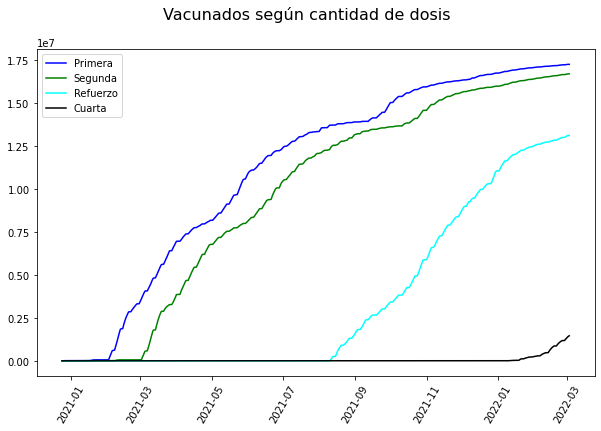

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Table['Fecha'], Table['Vacunados con Primera Dosis'], label='Primera',color='blue')
plt.plot(Table['Fecha'], Table['Vacunados con Segunda Dosis'],label='Segunda',color='green')
plt.plot(Table['Fecha'], Table['Vacunados con Dosis de Refuerzo'],label='Refuerzo',color='cyan')
plt.plot(Table['Fecha'], Table['Cuarta'],label='Cuarta',color='black')
plt.xticks(rotation=60)
plt.legend()
plt.suptitle('Vacunados según cantidad de dosis', fontsize=16)
plt.show()

#### Cantidad de Fallecidos diarios confirmados nacionales

In [ ]:
RutaFalle = '/content/Datos-COVID19/output/producto84/fallecidos_comuna_edad_confirmadas_std.csv'
Falle = pd.read_csv(RutaFalle)
Falle

,Region,Codigo region,Comuna,Codigo comuna,Edad,Fecha,Total
0,Antofagasta,2,Antofagasta,2101,<=39,2020-03-16,0.0
1,Antofagasta,2,Antofagasta,2101,40-49,2020-03-16,0.0
2,Antofagasta,2,Antofagasta,2101,50-59,2020-03-16,0.0
3,Antofagasta,2,Antofagasta,2101,60-69,2020-03-16,0.0
4,Antofagasta,2,Antofagasta,2101,70-79,2020-03-16,0.0
...,...,...,...,...,...,...,...
1719615,Valparaiso,5,Zapallar,5405,50-59,2022-02-23,0.0
1719616,Valparaiso,5,Zapallar,5405,60-69,2022-02-23,0.0
1719617,Valparaiso,5,Zapallar,5405,70-79,2022-02-23,0.0
1719618,Valparaiso,5,Zapallar,5405,80-89,2022-02-23,0.0


In [ ]:
Falle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719620 entries, 0 to 1719619
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Region         object 
 1   Codigo region  int64  
 2   Comuna         object 
 3   Codigo comuna  int64  
 4   Edad           object 
 5   Fecha          object 
 6   Total          float64
dtypes: float64(1), int64(2), object(4)
memory usage: 91.8+ MB


In [ ]:
Fallecidos_Confirmados = pd.pivot_table(Falle, values='Total',index='Fecha',
                     aggfunc=np.sum)

In [ ]:
Fallecidos_Confirmados= pd.DataFrame(Fallecidos_Confirmados)
Fallecidos_Confirmados = Fallecidos_Confirmados.rename_axis('Fecha').reset_index()

In [ ]:
Fallecidos_Confirmados['Fecha'] = pd.to_datetime(Fallecidos_Confirmados.Fecha, format='%Y/%m/%d')

In [ ]:
Fallecidos_Confirmados.rename({'Total':'Fallecidos diarios'}, axis=1, inplace=True)

In [ ]:
Fallecidos_Confirmados

,Fecha,Fallecidos diarios
0,2020-03-16,0.0
1,2020-03-17,0.0
2,2020-03-18,0.0
3,2020-03-19,1.0
4,2020-03-20,1.0
...,...,...
705,2022-02-19,96.0
706,2022-02-20,110.0
707,2022-02-21,109.0
708,2022-02-22,98.0


### Preparación de los datos

In [ ]:
Data1 = CasosUCI_Covid.merge(Positividad, how='left', on=['Fecha','Region ID']).merge(CamasUCI, how='left', on=['Fecha','Region']).merge(CasosNuevosCS_Covid, how='left', on=['Fecha','Region']).merge(CasosNuevosSS_Covid, how='left', on=['Fecha','Region'])

In [ ]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44224 entries, 0 to 44223
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Region                 44224 non-null  object        
 1   Region ID              44224 non-null  int64         
 2   Poblacion              44224 non-null  int64         
 3   Fecha                  44224 non-null  datetime64[ns]
 4   Casos UCI              44224 non-null  int64         
 5   Tasa de Positividad    43443 non-null  float64       
 6   Camas UCI Disponibles  43968 non-null  float64       
 7   Casos Con Sintomas     44224 non-null  float64       
 8   Casos Sin Sintomas     43056 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.4+ MB


In [ ]:
Data1['Region'].unique()

array(['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
       'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén',
       'Magallanes'], dtype=object)

In [ ]:
Data1

,Region,Region ID,Poblacion,Fecha,Casos UCI,Tasa de Positividad,Camas UCI Disponibles,Casos Con Sintomas,Casos Sin Sintomas
0,Arica y Parinacota,15,252110,2020-04-01,0,0.073907,NaN,0.0,NaN
1,Tarapacá,1,382773,2020-04-01,1,0.052444,NaN,0.0,NaN
2,Antofagasta,2,691854,2020-04-01,3,0.075543,NaN,4.0,NaN
3,Atacama,3,314709,2020-04-01,0,0.021916,NaN,1.0,NaN
4,Coquimbo,4,836096,2020-04-01,1,0.060391,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...
44219,Araucanía,9,1014343,2022-03-04,52,NaN,NaN,830.0,278.0
44220,Los Ríos,14,405835,2022-03-04,15,NaN,NaN,506.0,58.0
44221,Los Lagos,10,891440,2022-03-04,65,NaN,NaN,716.0,349.0
44222,Aysén,11,107297,2022-03-04,3,NaN,NaN,82.0,80.0


In [ ]:
#Data1['PCR Realizados'].fillna(value=0, inplace=True)
Data1['Tasa de Positividad'].fillna(value=Data1['Tasa de Positividad'].mean(), inplace=True)
Data1['Camas UCI Disponibles'].fillna(value=0, inplace=True)
Data1['Casos Sin Sintomas'].fillna(value=1, inplace=True)

In [ ]:
missingD = Data1.isnull().sum()
missingD

Region                   0
Region ID                0
Poblacion                0
Fecha                    0
Casos UCI                0
Tasa de Positividad      0
Camas UCI Disponibles    0
Casos Con Sintomas       0
Casos Sin Sintomas       0
dtype: int64

In [ ]:
NacionalD = Data1.groupby(by='Fecha',as_index=False)['Casos UCI','Tasa de Positividad','Camas UCI Disponibles','Casos Con Sintomas','Casos Sin Sintomas'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
NacionalD

,Fecha,Casos UCI,Tasa de Positividad,Camas UCI Disponibles,Casos Con Sintomas,Casos Sin Sintomas
0,2020-04-01,173,2.043102,0.0,293.0,16.0
1,2020-04-02,200,1.997834,0.0,373.0,16.0
2,2020-04-03,237,1.898327,0.0,333.0,16.0
3,2020-04-04,280,1.883909,0.0,424.0,16.0
4,2020-04-05,307,1.828101,0.0,310.0,16.0
...,...,...,...,...,...,...
698,2022-02-28,4316,5.647160,6160.0,41044.0,7592.0
699,2022-03-01,4428,5.647160,6184.0,36956.0,4688.0
700,2022-03-02,1100,1.411790,0.0,13074.0,2418.0
701,2022-03-03,1105,1.411790,0.0,13531.0,3606.0


In [ ]:
NacionalD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  703 non-null    datetime64[ns]
 1   Casos UCI              703 non-null    int64         
 2   Tasa de Positividad    703 non-null    float64       
 3   Camas UCI Disponibles  703 non-null    float64       
 4   Casos Con Sintomas     703 non-null    float64       
 5   Casos Sin Sintomas     703 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 33.1 KB


In [ ]:
Data2 = CasosNuevos.merge(ContAtm, how='left', on='Fecha').merge(Table, how='left', on='Fecha')


In [ ]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 732
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha                            733 non-null    datetime64[ns]
 1   Casos totales                    733 non-null    float64       
 2   Casos nuevos totales             733 non-null    float64       
 3   Casos activos por FD             733 non-null    float64       
 4   Casos recuperados por FD         733 non-null    float64       
 5   Nivel medio de CO                519 non-null    float64       
 6   Nivel medio de MP10              520 non-null    float64       
 7   Nivel medio de MP2.5             520 non-null    float64       
 8   Nivel medio de NO2               519 non-null    float64       
 9   Nivel medio de O3                519 non-null    float64       
 10  Nivel medio de SO2               519 non-null    float64      

In [ ]:
Data2.head()

,Fecha,Casos totales,Casos nuevos totales,Casos activos por FD,Casos recuperados por FD,Nivel medio de CO,Nivel medio de MP10,Nivel medio de MP2.5,Nivel medio de NO2,Nivel medio de O3,Nivel medio de SO2,Cuarta,Vacunados con Primera Dosis,Vacunados con Dosis de Refuerzo,Vacunados con Segunda Dosis,Vacunados con Dosis Unica
0,2020-03-02,1.0,1.0,1.0,0.0,0.358957,43.139603,12.191136,6.197548,13.689748,2.132609,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,1.0,0.0,1.0,0.0,0.384787,49.099025,13.371187,7.535886,15.638923,2.048414,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,3.0,2.0,3.0,0.0,0.364484,49.812689,14.051083,7.631662,14.621439,2.157435,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,4.0,1.0,4.0,0.0,0.411731,57.537860,16.507913,10.182037,16.328198,2.050105,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,5.0,1.0,5.0,0.0,0.422511,55.562031,14.668628,8.497915,15.788474,2.028052,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data2['Nivel medio de CO'].fillna(value=Data2['Nivel medio de CO'].mean(), inplace=True)
Data2['Nivel medio de MP10'].fillna(value=Data2['Nivel medio de MP10'].mean(), inplace=True)
Data2['Nivel medio de MP2.5'].fillna(value=Data2['Nivel medio de MP2.5'].mean(), inplace=True)
Data2['Nivel medio de NO2'].fillna(value=Data2['Nivel medio de NO2'].mean(), inplace=True)
Data2['Nivel medio de O3'].fillna(value=Data2['Nivel medio de O3'].mean(), inplace=True)
Data2['Nivel medio de SO2'].fillna(value=Data2['Nivel medio de SO2'].mean(), inplace=True)

Data2['Vacunados con Primera Dosis'].fillna(value=0, inplace=True)
Data2['Vacunados con Dosis de Refuerzo'].fillna(value=0, inplace=True)
Data2['Vacunados con Segunda Dosis'].fillna(value=0, inplace=True)
Data2['Vacunados con Dosis Unica'].fillna(value=0, inplace=True)
Data2['Cuarta'].fillna(value=0, inplace=True)

In [ ]:
Data2.isnull().sum()

Fecha                              0
Casos totales                      0
Casos nuevos totales               0
Casos activos por FD               0
Casos recuperados por FD           0
Nivel medio de CO                  0
Nivel medio de MP10                0
Nivel medio de MP2.5               0
Nivel medio de NO2                 0
Nivel medio de O3                  0
Nivel medio de SO2                 0
Cuarta                             0
Vacunados con Primera Dosis        0
Vacunados con Dosis de Refuerzo    0
Vacunados con Segunda Dosis        0
Vacunados con Dosis Unica          0
dtype: int64

In [ ]:
BD_Covid = NacionalD.merge(Data2,how='left', on='Fecha' ).merge(Fallecidos_Confirmados, how='left', on='Fecha')

In [ ]:
BD_Covid

,Fecha,Casos UCI,Tasa de Positividad,Camas UCI Disponibles,Casos Con Sintomas,Casos Sin Sintomas,Casos totales,Casos nuevos totales,Casos activos por FD,Casos recuperados por FD,...,Nivel medio de MP2.5,Nivel medio de NO2,Nivel medio de O3,Nivel medio de SO2,Cuarta,Vacunados con Primera Dosis,Vacunados con Dosis de Refuerzo,Vacunados con Segunda Dosis,Vacunados con Dosis Unica,Fallecidos diarios
0,2020-04-01,173,2.043102,0.0,293.0,16.0,3031.0,293.0,2781.0,234.0,...,16.057875,6.486280,17.412100,2.253253,0.0,0.0,0.0,0.0,0.0,1.0
1,2020-04-02,200,1.997834,0.0,373.0,16.0,3404.0,373.0,3051.0,335.0,...,20.611233,14.052949,13.762946,1.368173,0.0,0.0,0.0,0.0,0.0,6.0
2,2020-04-03,237,1.898327,0.0,333.0,16.0,3737.0,333.0,3288.0,427.0,...,20.611233,14.052949,13.762946,1.368173,0.0,0.0,0.0,0.0,0.0,7.0
3,2020-04-04,280,1.883909,0.0,424.0,16.0,4161.0,424.0,3606.0,528.0,...,20.611233,14.052949,13.762946,1.368173,0.0,0.0,0.0,0.0,0.0,8.0
4,2020-04-05,307,1.828101,0.0,310.0,16.0,4471.0,310.0,3820.0,617.0,...,20.611233,14.052949,13.762946,1.368173,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,2022-02-28,4316,5.647160,6160.0,41044.0,7592.0,3061019.0,18148.0,408306.0,2610360.0,...,20.611233,14.052949,13.762946,1.368173,1266118.0,17219365.0,13030180.0,16657151.0,574263.0,NaN
699,2022-03-01,4428,5.647160,6184.0,36956.0,4688.0,3076291.0,13928.0,398599.0,2635311.0,...,20.611233,14.052949,13.762946,1.368173,1341085.0,17228651.0,13070319.0,16670262.0,574270.0,NaN
700,2022-03-02,1100,1.411790,0.0,13074.0,2418.0,3098110.0,20400.0,388256.0,2667443.0,...,20.611233,14.052949,13.762946,1.368173,1410044.0,17234915.0,13096116.0,16678828.0,574307.0,NaN
701,2022-03-03,1105,1.411790,0.0,13531.0,3606.0,3122802.0,23395.0,375250.0,2704869.0,...,20.611233,14.052949,13.762946,1.368173,1456159.0,17238226.0,13108889.0,16683374.0,574308.0,NaN


In [ ]:
BD_Covid['Fallecidos diarios'].fillna(value=0, inplace=True)

In [ ]:
BD_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 702
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha                            703 non-null    datetime64[ns]
 1   Casos UCI                        703 non-null    int64         
 2   Tasa de Positividad              703 non-null    float64       
 3   Camas UCI Disponibles            703 non-null    float64       
 4   Casos Con Sintomas               703 non-null    float64       
 5   Casos Sin Sintomas               703 non-null    float64       
 6   Casos totales                    703 non-null    float64       
 7   Casos nuevos totales             703 non-null    float64       
 8   Casos activos por FD             703 non-null    float64       
 9   Casos recuperados por FD         703 non-null    float64       
 10  Nivel medio de CO                703 non-null    float64      

In [ ]:
BD_Covid['Fecha'] = pd.to_datetime(BD_Covid['Fecha'], format='%Y/%m/%d')
BD_CovidF = BD_Covid.copy().set_index('Fecha')

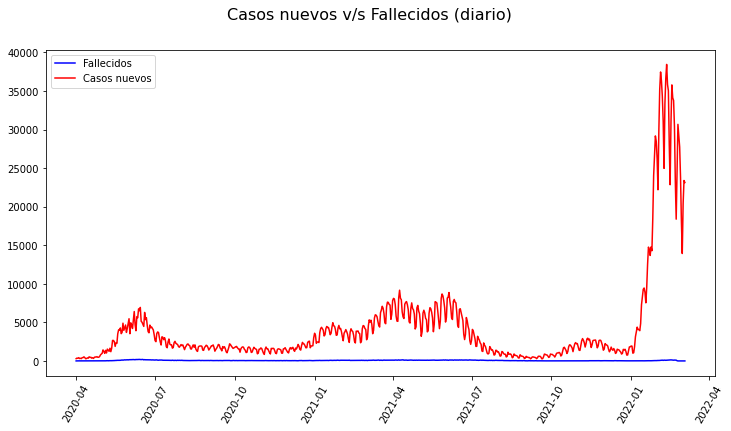

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(BD_Covid['Fecha'], BD_Covid['Fallecidos diarios'],label='Fallecidos',color='blue')
plt.plot(BD_Covid['Fecha'], BD_Covid['Casos nuevos totales'],label='Casos nuevos',color='red')
plt.xticks(rotation=60)
plt.legend()
plt.suptitle('Casos nuevos v/s Fallecidos (diario)', fontsize=16)
plt.show()

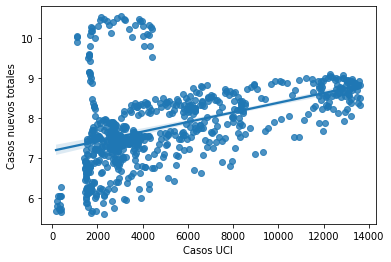

In [ ]:
sb.regplot(y=np.log(BD_Covid['Casos nuevos totales']), x=BD_Covid['Casos UCI'])

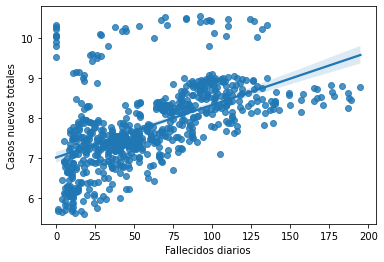

In [ ]:
sb.regplot(y=np.log(BD_Covid['Casos nuevos totales']), x=BD_Covid['Fallecidos diarios'])

### EDA - Analisis Exploratorio de los Datos

Modelos de aprendizaje no supervisado

#### Aplicación PCA - Componentes Principales

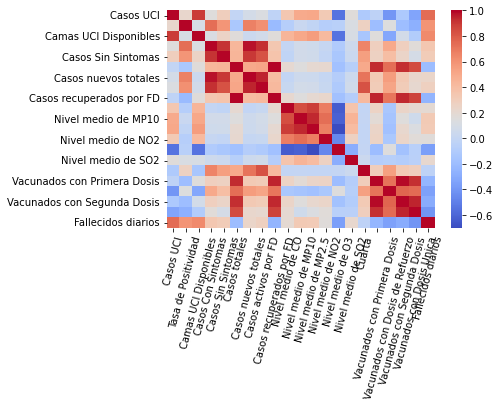

In [ ]:
worst =list(BD_Covid.columns[0:22])
s = sb.heatmap(BD_Covid[worst].corr(),cmap='coolwarm')
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=10)
s.set_xticklabels(s.get_xticklabels(), rotation=75, fontsize=10)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
BD2 = BD_Covid.iloc[:, 1:22]
scaler = StandardScaler()
BaseStand = scaler.fit_transform(BD2)

In [ ]:
Base_cov = np.cov(BaseStand)
print(BaseStand.shape)
print(Base_cov)

(703, 21)
[[2.31385909 0.82750001 0.8264505  ... 0.46305549 0.4565735  0.40141818]
 [0.82750001 0.62288872 0.62203523 ... 0.58837211 0.59192403 0.36425995]
 [0.8264505  0.62203523 0.62125138 ... 0.58694736 0.59031954 0.36281482]
 ...
 [0.46305549 0.58837211 0.58694736 ... 5.3920464  5.48637369 2.13510039]
 [0.4565735  0.59192403 0.59031954 ... 5.48637369 5.60009031 2.1850626 ]
 [0.40141818 0.36425995 0.36281482 ... 2.13510039 2.1850626  2.74973309]]


In [ ]:
from numpy.linalg import eig
eigvalues, eigvectors = eig(Base_cov)
print(eigvalues[:10])
print(eigvectors.shape)

[191.27572416+0.j 145.87300054+0.j  65.96354584+0.j  49.58257889+0.j
  24.06207642+0.j  20.99470434+0.j  13.39737133+0.j  12.13728519+0.j
   6.58193154+0.j   5.02921029+0.j]
(703, 703)


In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=3)
pca2.fit(BaseStand)

PCA(n_components=3)

In [ ]:
PCA2 = pca2.transform(BaseStand)

varianza explicada PCA (703, 3)
[0.34082264 0.24718006 0.19539407]
suma: 0.783396766238004


Text(0, 0.5, 'Varianza explicada acumulada')

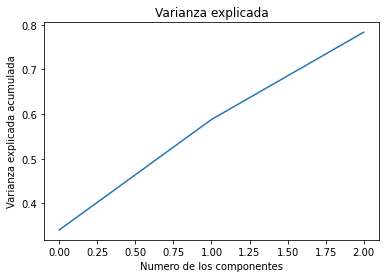

In [ ]:
print('varianza explicada PCA', PCA2.shape)
expl = pca2.explained_variance_ratio_
print(expl)
print('suma:', sum(expl[0:3]))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.title('Varianza explicada')
plt.xlabel('Numero de los componentes')
plt.ylabel('Varianza explicada acumulada')


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.34082264 0.24718006 0.19539407]


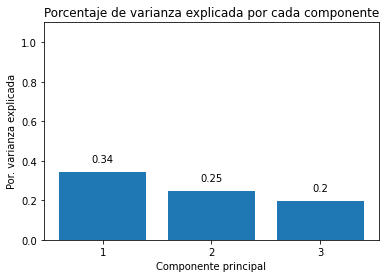

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca2.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca2.n_components_) + 1,
    height = pca2.explained_variance_ratio_
)

for x, y in zip(np.arange(len(BD2.columns)) + 1, pca2.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca2.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
BD_PCA = pd.DataFrame(
    data    = pca2.components_,
    columns = BD2.columns,
    index   = ['PC1', 'PC2', 'PC3'])

BD_PCA

,Casos UCI,Tasa de Positividad,Camas UCI Disponibles,Casos Con Sintomas,Casos Sin Sintomas,Casos totales,Casos nuevos totales,Casos activos por FD,Casos recuperados por FD,Nivel medio de CO,...,Nivel medio de MP2.5,Nivel medio de NO2,Nivel medio de O3,Nivel medio de SO2,Cuarta,Vacunados con Primera Dosis,Vacunados con Dosis de Refuerzo,Vacunados con Segunda Dosis,Vacunados con Dosis Unica,Fallecidos diarios
PC1,0.045602,0.088979,0.086145,0.272028,0.254134,0.337631,0.285201,0.284360,0.321538,0.118302,...,0.128270,0.110317,-0.112843,0.028759,0.242668,0.308440,0.274382,0.306821,0.265906,0.018603
PC2,0.348581,0.071378,0.331471,-0.005157,0.017855,-0.081910,-0.036183,-0.021293,-0.084259,0.313386,...,0.356599,0.270354,-0.309071,0.190151,-0.099653,-0.072260,-0.244167,-0.097365,-0.148679,0.291209
PC3,0.102728,0.407656,0.002048,0.323776,0.301763,-0.147935,0.299424,0.290148,-0.194981,-0.190594,...,-0.148738,-0.173392,0.076200,0.004273,0.171605,-0.233689,-0.024283,-0.237252,-0.272121,0.262427


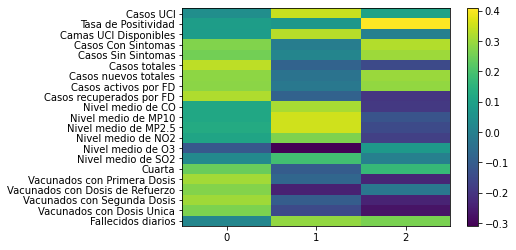

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = pca2.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(BD2.columns)), BD2.columns)
plt.xticks(np.arange(pca2.n_components_))
plt.grid(False)
plt.colorbar()
plt.show()

### Modelamiento
Modelos de aprendizaje supervisado

#### Regresión lineal aplicado con PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import multiprocessing

In [ ]:
X1 = BD2.drop(columns='Casos nuevos totales')
y1 = BD2['Casos nuevos totales']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

In [ ]:
RPCA = make_pipeline(StandardScaler(), PCA(n_components=3), LinearRegression())
RPCA.fit(X=X1_train, y=y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('linearregression', LinearRegression())])

In [ ]:
# Predicciones test
predicciones = RPCA.predict(X=X1_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y1_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 1270.6647243721352


In [ ]:
mse = mean_squared_error(y1_test,predicciones)
print('Mean Squared Error: ',mse)

Mean Squared Error:  1614588.8417637146


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1_test,predicciones)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  1002.4986343114741


In [ ]:
print(metrics.r2_score(y1_test, predicciones))

-1.89429274345243


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



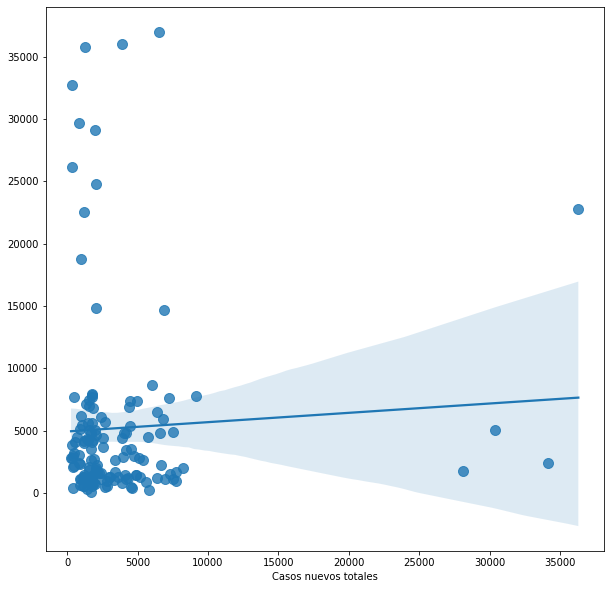

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(y1_test, predicciones, fit_reg=True, scatter_kws={"s": 100})

#### Regresión Lineal Multivariable


count    703.0
mean       0.0
std        1.0
min       -1.0
25%       -0.0
50%       -0.0
75%        0.0
max        5.0
Name: PjeZ, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



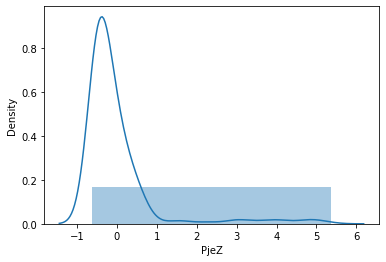

In [ ]:
BD2['PjeZ'] = (BD2['Casos nuevos totales'] - BD2['Casos nuevos totales'].mean())/BD2['Casos nuevos totales'].std(ddof=0)
print(round(BD2['PjeZ'].describe(include= all)))
sns.distplot(BD2['PjeZ'], bins= 1)

In [ ]:
BD2.drop('PjeZ', axis=1, inplace=True)
y = BD2['Casos nuevos totales']
X = BD2.drop(columns='Casos nuevos totales')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
model = LinearRegression()
modelo = model.fit(X = X_train, y = y_train)

In [ ]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 1603.3550604705902


In [ ]:
Y_pred = modelo.predict(X_test)
Y_pred

array([ 4518.44873797, 14861.64736807,  5065.01189371,  1087.18445845,
         506.26736191,   364.85860307,  1144.47450228,  2331.96005342,
        4787.55398145, 24809.81244815,  4339.06385587,  2840.54962302,
        4778.15160944,  1373.48376483,  1418.98568647,  5449.27247778,
        1583.33485984,  3425.38805725,  5121.33792387,  1150.90840188,
        2619.80387064,   507.00733309,   561.82887757,  7490.05939943,
       14640.95142658,  3865.95625979,  3983.78971351, 29155.08329157,
        1133.00199482,  7820.06679123,  3714.36971053,  1672.74006161,
        3201.33103288,  1662.19148565,  7742.69438193, 18748.60186301,
        7371.58313805,   934.3550217 ,  4682.85939606,  2237.1209596 ,
         416.97974602,  2791.14624226,  8620.44648212,  7933.36263964,
         518.6205422 ,  5066.55721296,  2669.65864901,  2716.31654627,
        3499.56134668,   740.8550509 ,  1464.44227522,   584.2279204 ,
        1273.52366849,  4121.1765937 ,  7679.35125219,  7403.05262659,
      

In [ ]:
mae = mean_absolute_error(y_test,Y_pred)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  478.60081003449324


0.9564542051350339
0.10906378023441902


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



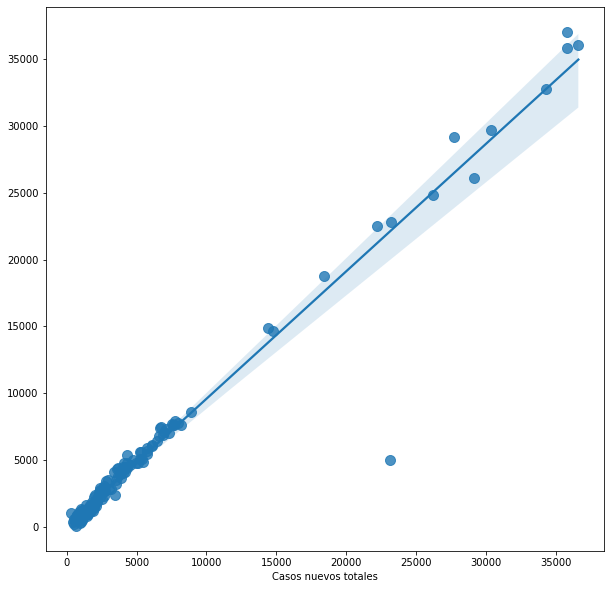

In [ ]:
print(metrics.r2_score(y_test, Y_pred))
print(metrics.mean_squared_log_error(y_test, Y_pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, Y_pred, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
Tabla = pd.DataFrame(y_test)
Tabla['predicto'] = Y_pred.round(2)
Tabla.head(30)

,Casos nuevos totales,predicto
311,4063.0,4518.45
661,14449.0,14861.65
702,23132.0,5065.01
12,312.0,1087.18
483,828.0,506.27
17,478.0,364.86
258,1498.0,1144.47
456,2677.0,2331.96
441,4347.0,4787.55
670,26244.0,24809.81


#### Regresión con Regulacion ElasticNet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+08, tolerance: 1.982e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



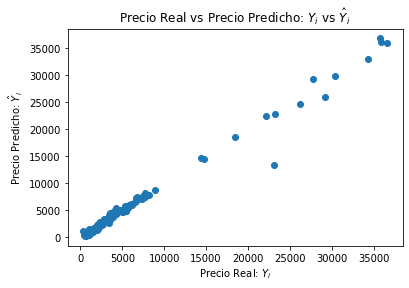

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0,l1_ratio=0.9) # Entre más alto sea el valor alfa, más restringue a los coeficientes
en.fit(X_train,y_train)
Y_pred_train = en.predict(X_train) #predicciones para nuestro set de entrenamiento
Y_pred = en.predict(X_test) #predicciones para nuestro set de prueba o testing

#Mediante un grafico vamos a ver como estan nuestras predicciones
import matplotlib.pyplot as plt
plt.scatter(y_test,Y_pred)
plt.xlabel("Precio Real: $Y_i$")
plt.ylabel("Precio Predicho: $\hat{Y}_i$")
plt.title("Precio Real vs Precio Predicho: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train,Y_pred_train)
print('Mean Squared Error, training:',mse)
mse = mean_squared_error(y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error, training: 477096.4854397007
Mean Squared Error:  922477.4088296159
R-square, Training:  0.9864720621331254
R-square, Testing:  0.9843741896881197


In [ ]:
mae = mean_absolute_error(y_test,Y_pred)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  407.9098519834128


0.9843741896881197
0.07404226129504277


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



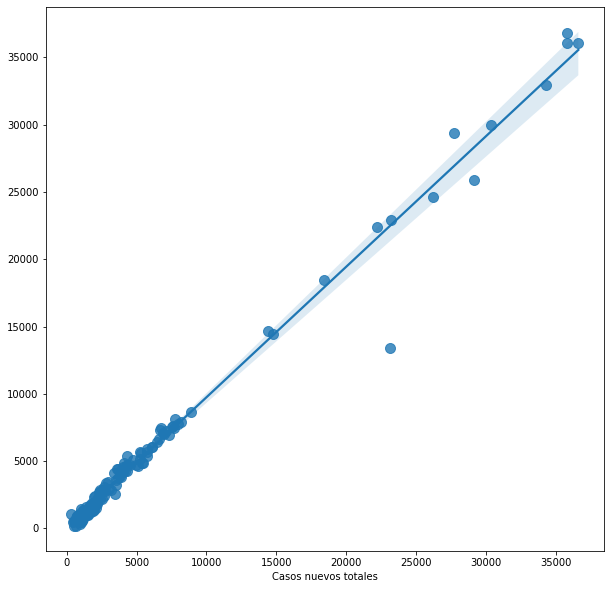

In [ ]:
print(metrics.r2_score(y_test, Y_pred))
print(metrics.mean_squared_log_error(y_test,Y_pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, Y_pred, fit_reg=True, scatter_kws={"s": 100})

#### Gradient Boosting Regressor



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Standardize the dataset
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'learning_rate': 0.05}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train_std, y_train)

# Print Coefficient of determination R^2
print("Model Coef. Determinación: %.3f" % gbr.score(X_test_std, y_test))

# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Coef. Determinación: 0.986
The mean squared error (MSE) on test set: 841623.3843


In [ ]:
Y_pred = gbr.predict(X_test_std)

In [ ]:
mae = mean_absolute_error(y_test,Y_pred)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  240.9634412040041


0.9857437729840465
0.0039088331428926105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



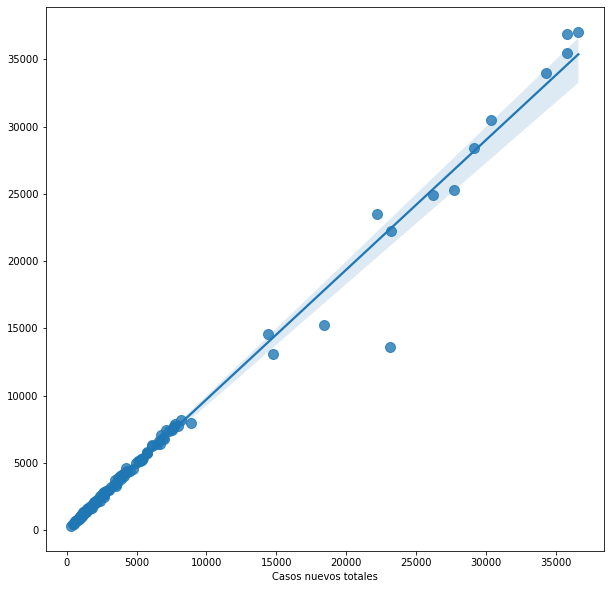

In [ ]:
print(metrics.r2_score(y_test, Y_pred))
print(metrics.mean_squared_log_error(y_test,Y_pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, Y_pred, fit_reg=True, scatter_kws={"s": 100})

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor (n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
Y_pred_t = regressor.predict(X_train)
Y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_train,Y_pred_t)
print('Mean Squared Error, training:',mse)
mse = mean_squared_error(y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(y_train,Y_pred_t)
print('R-square, Training: ',rsq)
rsq = r2_score(y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error, training: 42809.70323505338
Mean Squared Error:  1237816.8661737589
R-square, Training:  0.9987861427968193
R-square, Testing:  0.9790326664192058


In [ ]:
mae = mean_absolute_error(y_test,Y_pred)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  261.7539716312057


0.9790326664192058
0.007279420303618186


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



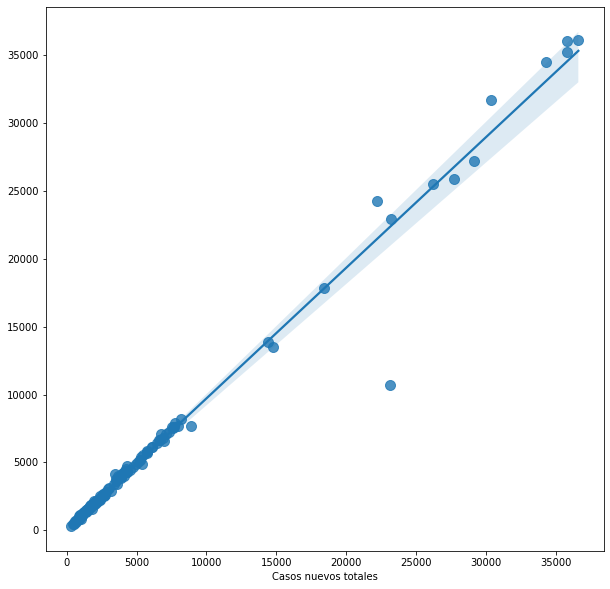

In [ ]:
print(metrics.r2_score(y_test, Y_pred))
print(metrics.mean_squared_log_error(y_test, Y_pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, Y_pred, fit_reg=True, scatter_kws={"s": 100})

#### AdaBoost Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model_ABR = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators = 1000,
                              random_state=0)
model_ABR.fit(X_train, y_train)
print(model_ABR)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                  random_state=0)


In [ ]:
predicted_y = model_ABR.predict(X_test)

In [ ]:
mse = mean_squared_error(y_train,y_train)
print('Mean Squared Error, training:',mse)
mse = mean_squared_error(y_test,predicted_y)
print('Mean Squared Error: ',mse)
rsq = r2_score(y_train,y_train)
print('R-square, Training: ',rsq)
rsq = r2_score(y_test,predicted_y)
print('R-square, Testing: ',rsq)

Mean Squared Error, training: 0.0
Mean Squared Error:  1965933.7659574468
R-square, Training:  1.0
R-square, Testing:  0.9666991214976784


In [ ]:
mae = mean_absolute_error(y_test,predicted_y)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  308.12056737588654


0.9666991214976784
0.013904885149549812


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



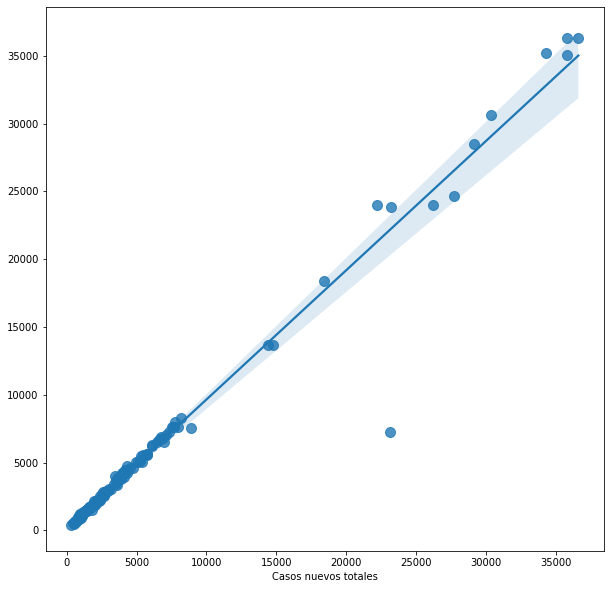

In [ ]:
print(metrics.r2_score(y_test, predicted_y))
print(metrics.mean_squared_log_error(y_test, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(y_test, predicted_y, fit_reg=True, scatter_kws={"s": 100})